#DTSC-670 Final Project
##Part 1: Technical Implementation

###Name: Type Your Name Here Before Submitting

##Academic Integrity

**Key Principle: All work must be your own**

Plagiarism checks will be conducted at the end of the term for both code and written documents.

While you may look online for inspiration, all work in your project must be your own. Do not copy ideas from online sources or collaborate with classmates. Do not use Large Language Models (LLMs) to write your code. Relying on LLMs undermines your learning experience and violates academic ethics. This course is designed to develop your skills.

Do not share or post your work online. Use private repositories if needed. 

Violations will result in a zero grade for the assignment, possible failure of the course, and potential dismissal from the program.

##Overview

###Machine Learning Task
Suppose you work in the Advising Team for a large Portuguese school system, and your school director has asked you to analyze student data and create a machine learning model to predict a student’s performance based on select features. Your director hopes to use this information to identify students who might need additional assistance and interventions to improve their grades.

Your task is to create a regression model to predict a student's grade. You will need to clean and prepare the data to ensure it is suitable for analysis. After building the model, you will evaluate its performance using appropriate metrics to assess its accuracy and effectiveness.

###Note
Follow the instructions carefully and submit your notebook to CodeGrade for testing. Ensure you name the variables as indicated, as CodeGrade requires specific naming for proper evaluation.

##Get the Data

Begin by importing and inspecting your dataset to ensure it is correctly loaded and understand its structure. This initial step sets the foundation for your analysis and modeling.

1) **Import the Data**: Correctly import your data.
2) **Initial Data Check**: Check the initial data, including size and data types.
3) **Identify the Target**: Identify the target attribute.
4) **Split the Data**: Split your data into training and test sets using the variable names `X_train`, `X_test`, `y_train`, and `y_test`.  Use `test_size=0.2` and `random_state=42`.
5) **Comment Your Code**: Get into the habit of including comments in your code. Comments should explain <u>why</u> decisions were made, while the code should be clean enough to read and understand <u>what</u> the program does. 

<span style="color:red">Do not make changes to these training and test set DataFrames going forward. If you need to make changes, save them with a different name. CodeGrade will check them in their original form.</span>

*You may add additional markdown and code blocks to this template as needed.*

In [91]:
###ENTER CODE HERE ###

#invisible data, we dont knwo teahcing style, staff size, other "human" facvtors that are idiosyncratic form shcool to school, we will split raw data between schools, evalute them both, then combine results

#Import necessary libraries for all steps
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.feature_selection import SelectFromModel


#import datatset
student_raws = pd.read_csv('student-mat.csv')

#glean the data, basic info
print("Dataset Shape:", student_raws.shape)
print("\nData Types:")
print(student_raws.dtypes)
print(student_raws.head(20))

target_column = 'G3' #Final grade AKA our target

#drop the target from trianing, splice it into our target
X = student_raws.drop(columns=[target_column]) 
y = student_raws[target_column]  

#use the improted funciton and isntructed split percentage (20 for test set, 80 for training)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing target shape (y_test):", y_test.shape)

"""
Attributes
1. school - student's school ("GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex - student's sex ("F" - female or "M" - male)
3. age - student's age (numeric from 15 to 22)
4. address - student's home address type ("U" - urban or "R" - rural)
5. famsize - family size ("LE3" - less or equal to 3 or "GT3" - greater than 3)
6. Pstatus - parent's cohabitation status ("T" - living together or "A" - apart)
7. Medu - mother's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th
grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th
grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job ( "teacher", "health" care related, civil "services" (e.g. administrative
or police), "at_home" or "other")
10. Fjob - father's job ("teacher", "health" care related, civil "services" (e.g. administrative or
police), "at_home" or "other")
11. reason - reason to choose this school (close to "home", school "reputation", "course"
preference or "other")
12. guardian - student's guardian ("mother", "father" or "other")
13. traveltime - home to school travel time (1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1
hour, or 4 - >1 hour)
14. studytime - weekly study time (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10
hours)
15. failures - number of past class failures (n if 1<=n<3, else 4)
16. schoolsup - extra educational support (yes or no)
17. famsup - family educational support (yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (yes or no)
19. activities - extra-curricular activities (yes or no)
20. nursery - attended nursery school (yes or no)
21. higher - wants to take higher education (yes or no)
22. internet - Internet access at home (yes or no)
23. romantic - with a romantic relationship (yes or no)
24. famrel - quality of family relationships (from 1 - very bad to 5 - excellent)
25. freetime - free time after school (from 1 - very low to 5 - very high)
26. goout - going out with friends (from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (from 1 - very low to 5 - very high)
29. health - current health status (from 1 - very bad to 5 - very good)
30. absences_G1 - number of school absences for previous year’s G1 term (numeric)
31. absences_G2 - number of school absences for previous year’s G2 term (numeric)
32. absences_G3 - number of school absences for previous year’s G3 term (numeric)
#these grades are related with the course math subject
33. G1 - first term grade (numeric: from 0 to 20)
34. G2 - second term grade (numeric: from 0 to 20)
35. G3 - final grade (numeric: from 0 to 20, ← this is your output target)



"""



"""
No way are we using the address, only takes one bad actor to calssify these findigns as based on racial/socio economic bias. Travel distance can be used, but no sane analysis can consider specific address

Additionally, cut out or combine the parent features, such as job or education level. What, if a parent has x job or education, their child is doomed? We have to assume they need help or Were off the hook? Please. At least agrgegate them for some smeblance of neuttrality/genuine influence


"""

for column in student_raws.columns:
    print(student_raws[column].value_counts())

Dataset Shape: (395, 35)

Data Types:
school          object
sex             object
age            float64
address         object
famsize         object
Pstatus         object
Medu             int64
Fedu             int64
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences_G1    float64
absences_G2    float64
absences_G3    float64
G1               int64
G2               int64
G3               int64
dtype: object
   school sex   age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      GP   F  18.0       U     GT3       A     4     4   at_hom

##Explore the Data
Understanding your data is a crucial step before building any machine learning model. This exploration phase helps you identify patterns, detect anomalies, and uncover insights that will guide your modeling decisions. By thoroughly analyzing and visualizing the data, you can make informed choices on feature selection and preprocessing, ultimately improving your model's performance and reliability.

This section won't be automatically graded, but you must include your analytical insight and screenshots of your plots in the Executive Summary report.

In this section you should:
1) **Study Attributes**: Thoroughly study the training set attributes and their characteristics.
2) **Visualizations**: Use visualizations to effectively analyze and explore your data. Be ready to explain what the visualization shows and why it is important.  
3) **Correlations**: Analyze correlations between your numeric attributes.

*CodeGrade will only have matplotlib and seaborn libraries loaded. You can use other libraries (e.g., Plotly) or use software (e.g., Tableau) for your visualizations, but comment out any code that is not matplotlib or seaborn before submitting to CodeGrade including import statements.*

You will include your analysis and at least three plots in your Executive Summary. Use either screenshots and paste them into your Executive Summary document or the `savefig()` method. Here's example code for saving a plot in different file formats:
```
import matplotlib.pyplot as plt

#Your plotting code here
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Sample Plot')

#Save the plot as a PNG file
plt.savefig('my_plot.png')

#Optionally, save in other formats
plt.savefig('my_plot.pdf')
plt.savefig('my_plot.jpg')
```

Full Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    int64  
 7   Fedu         395 non-null    int64  
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    int64  
 13  studytime    395 non-null    int64  
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null

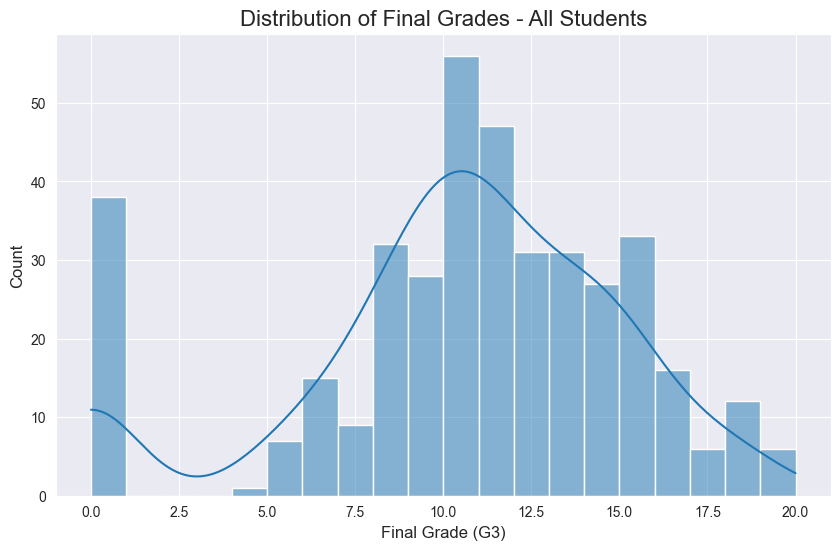

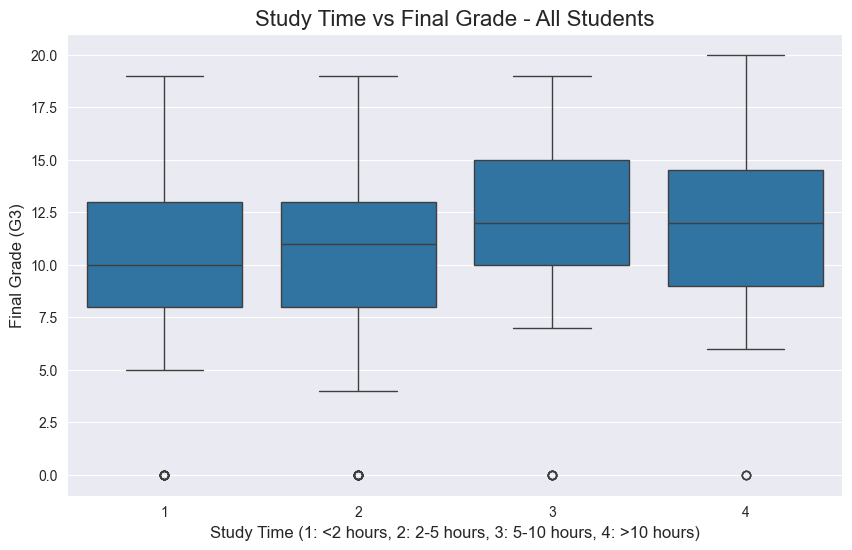

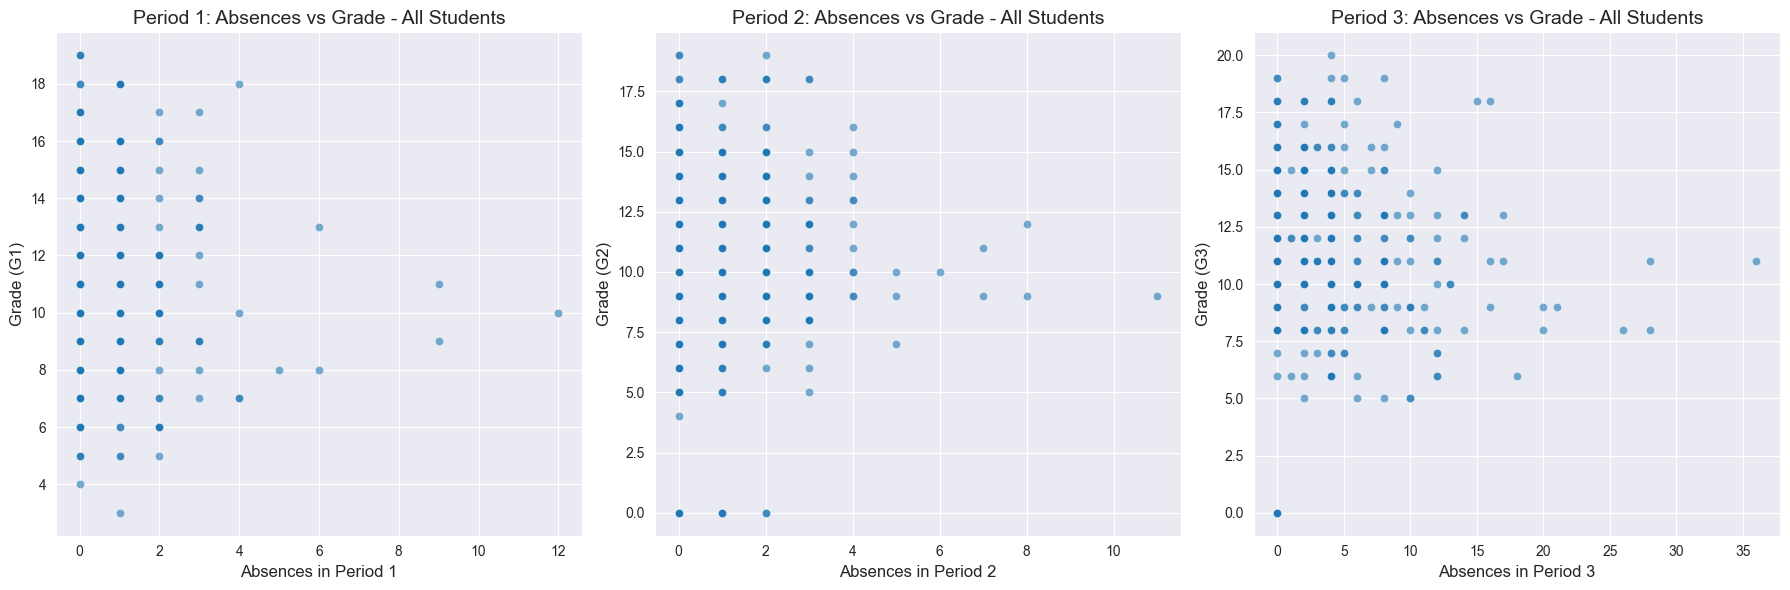

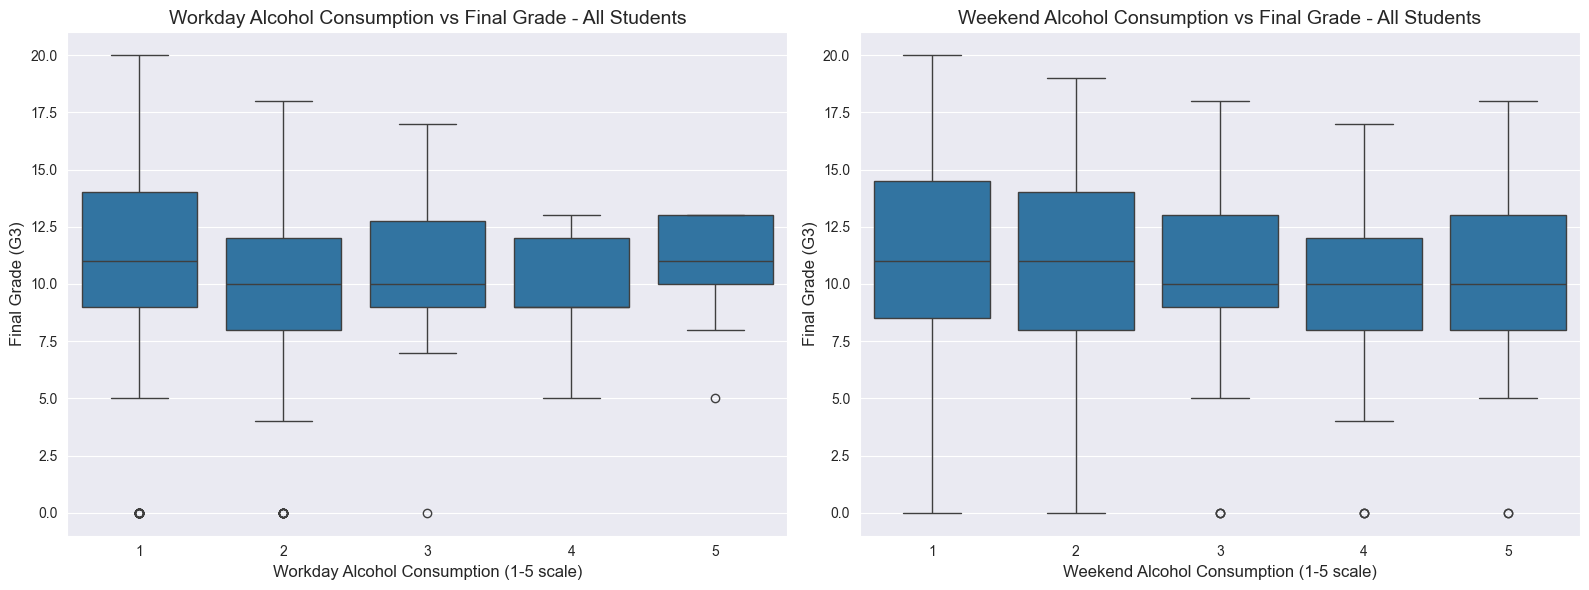

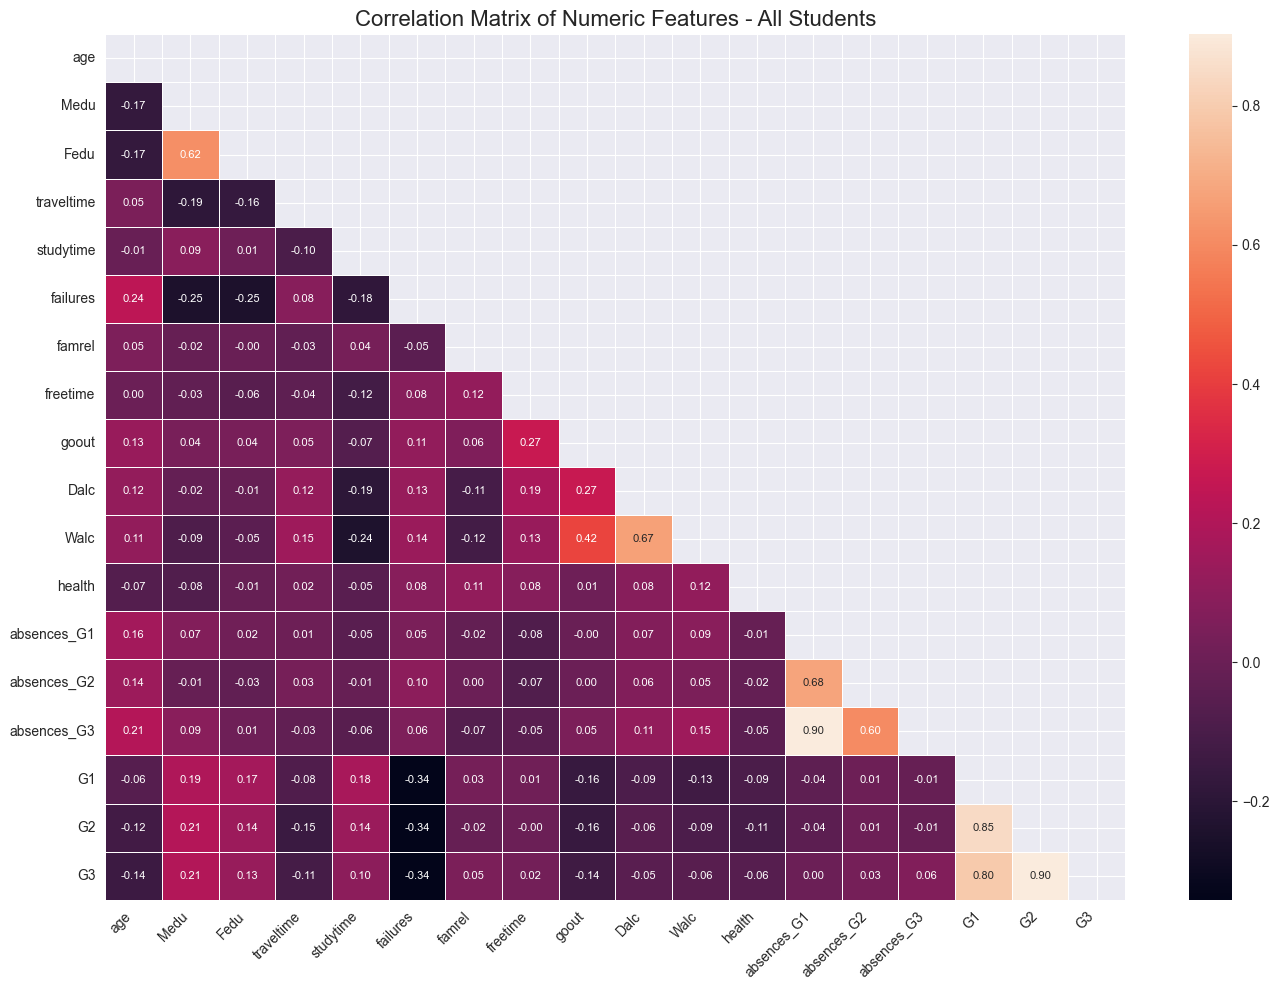

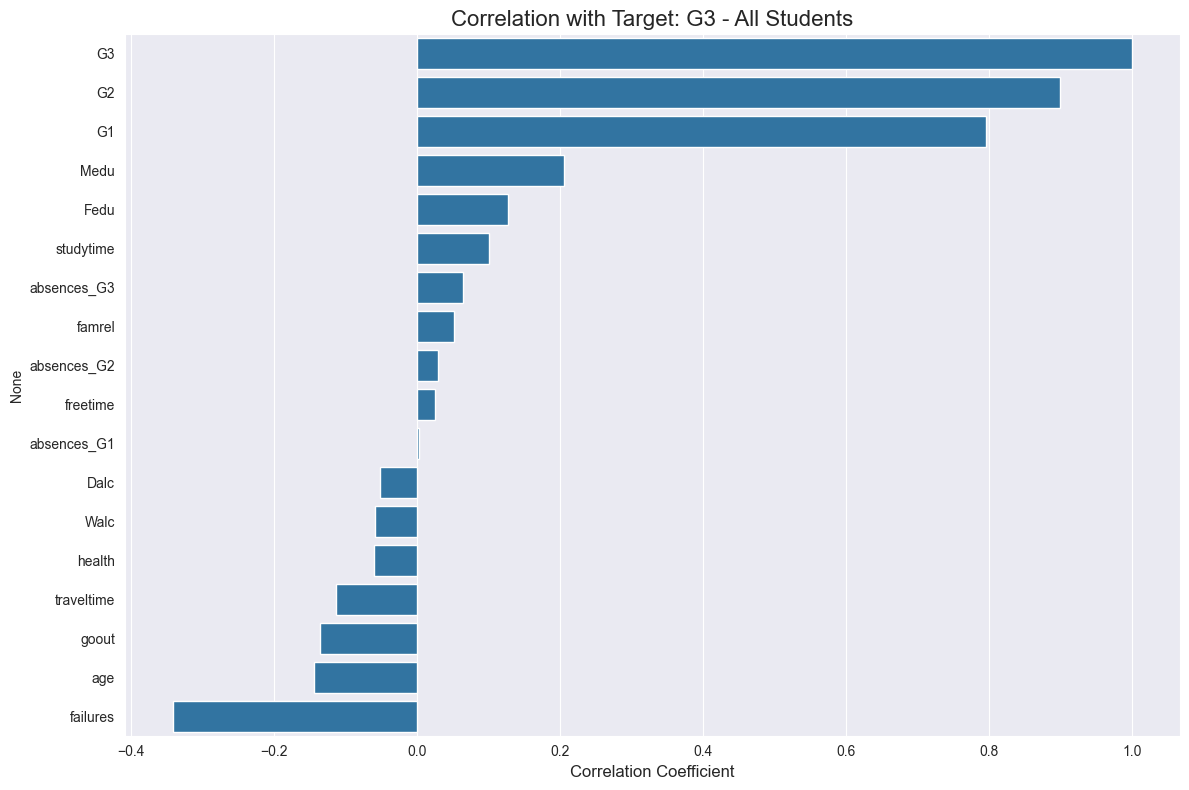

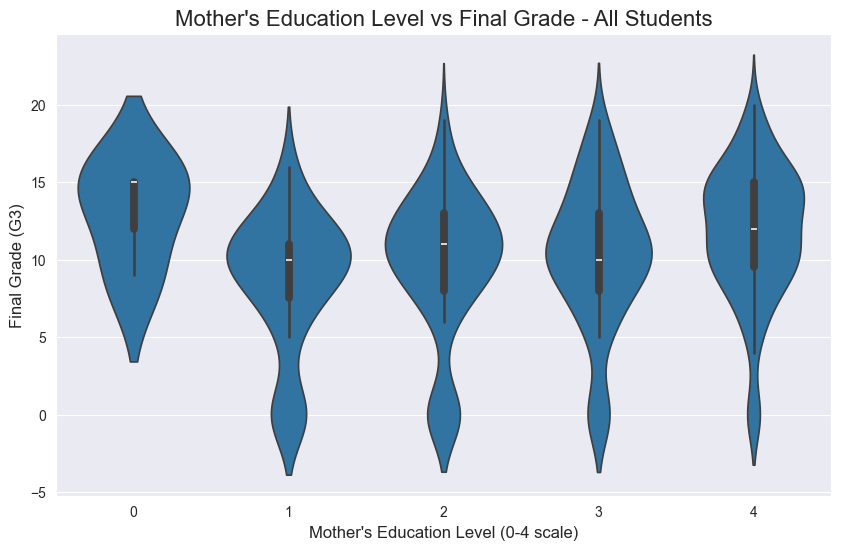

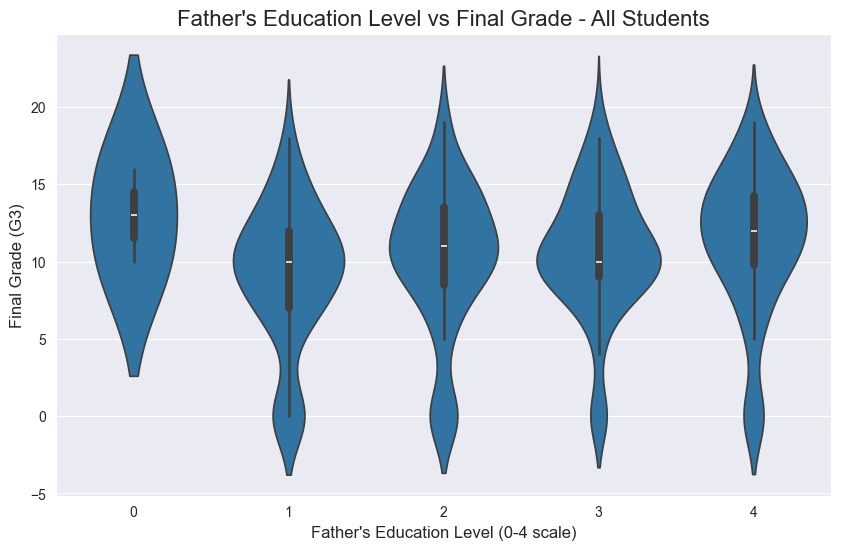

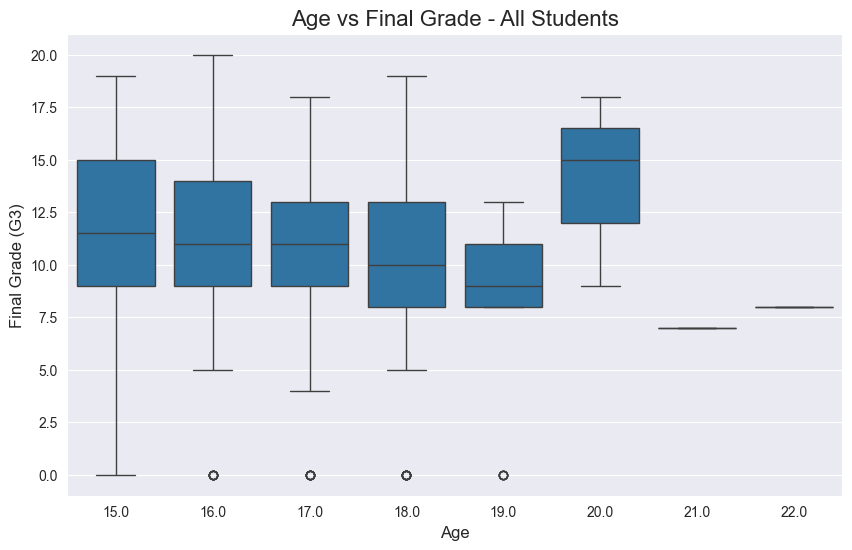

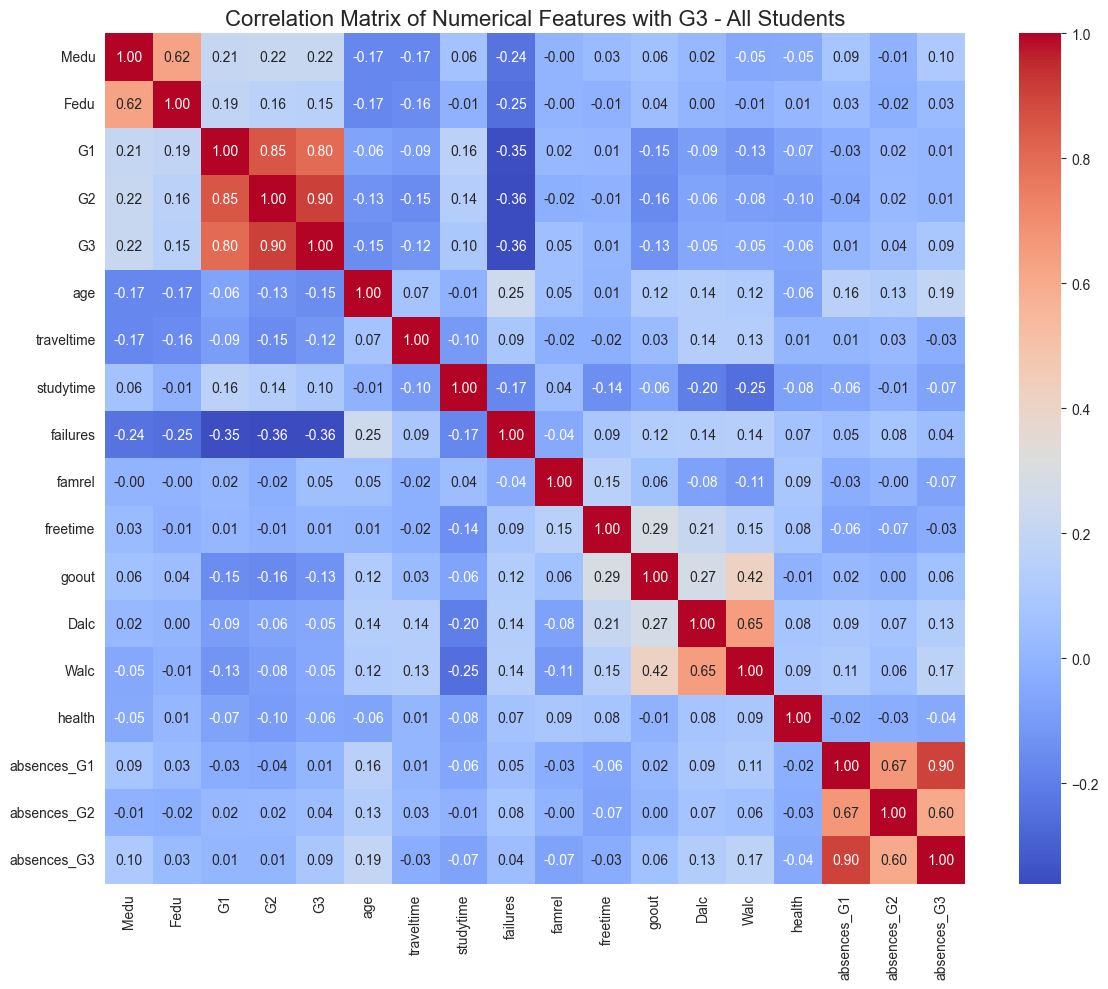

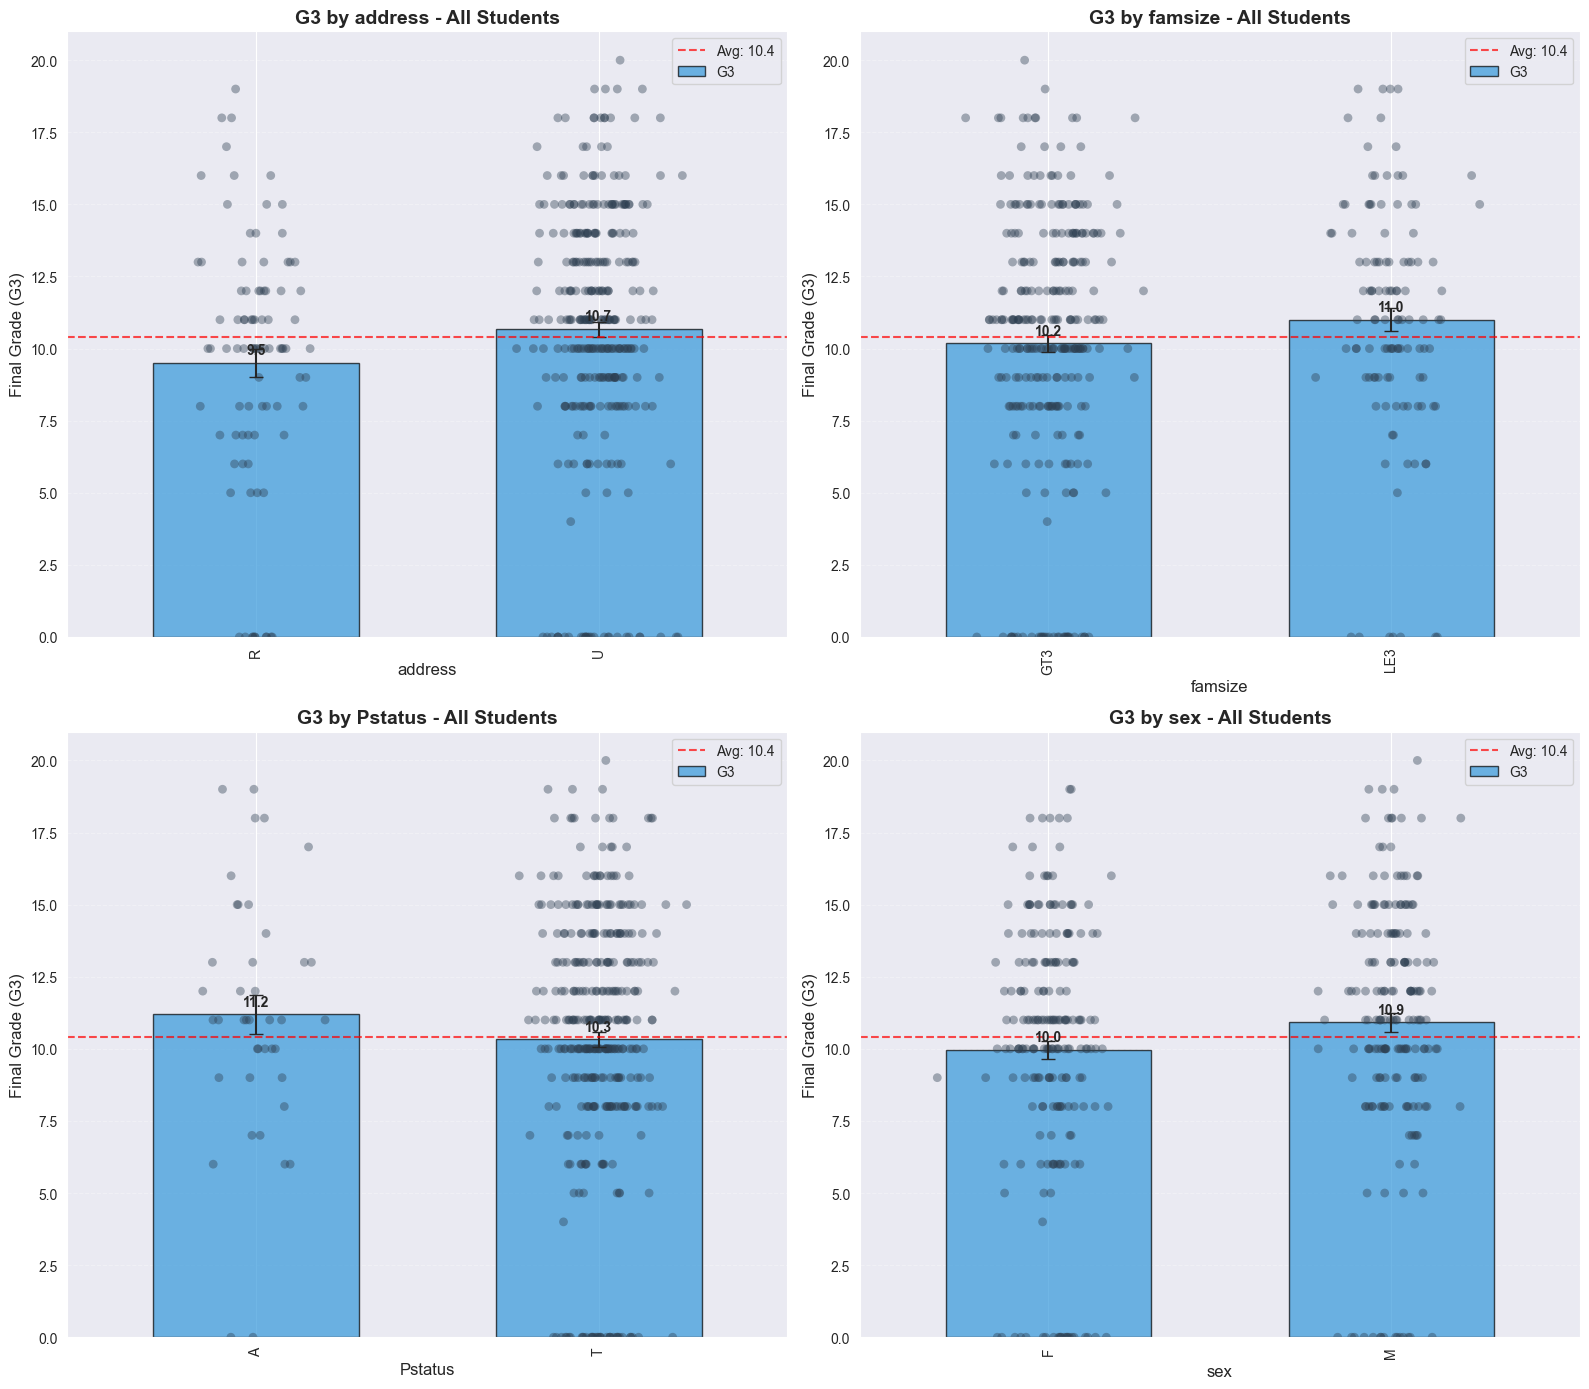

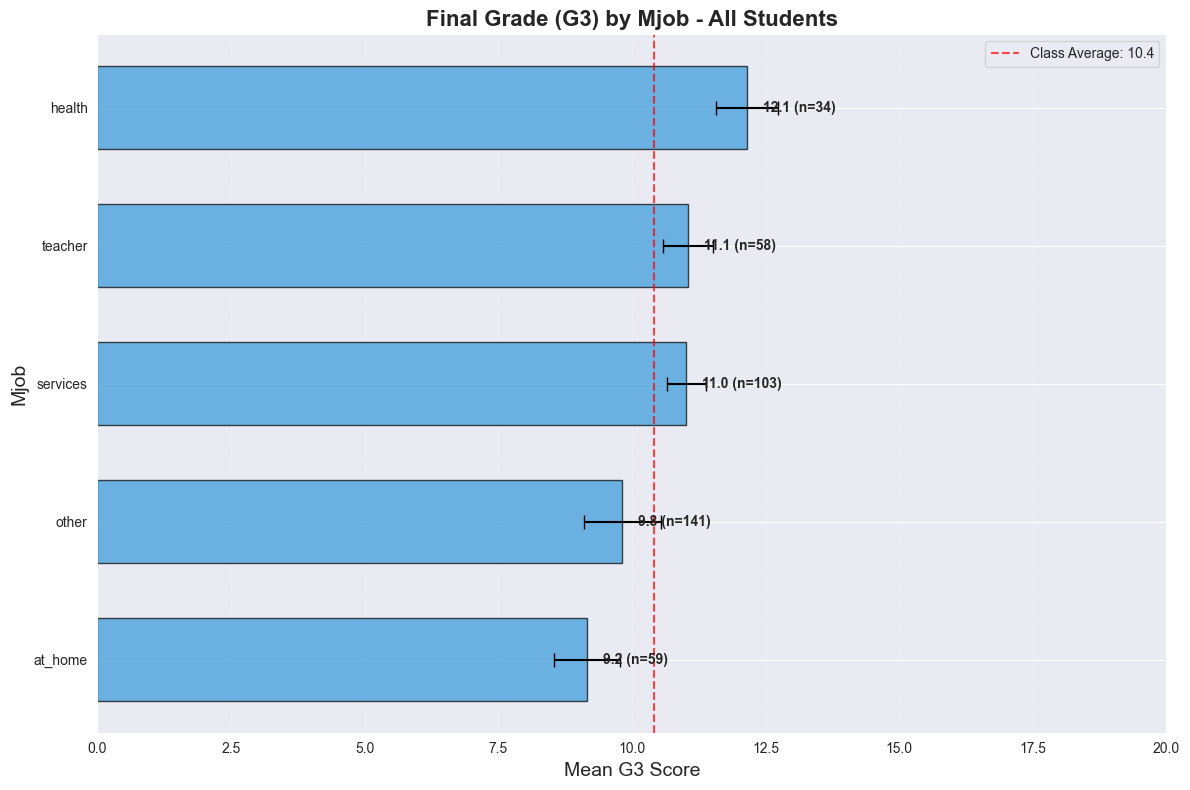

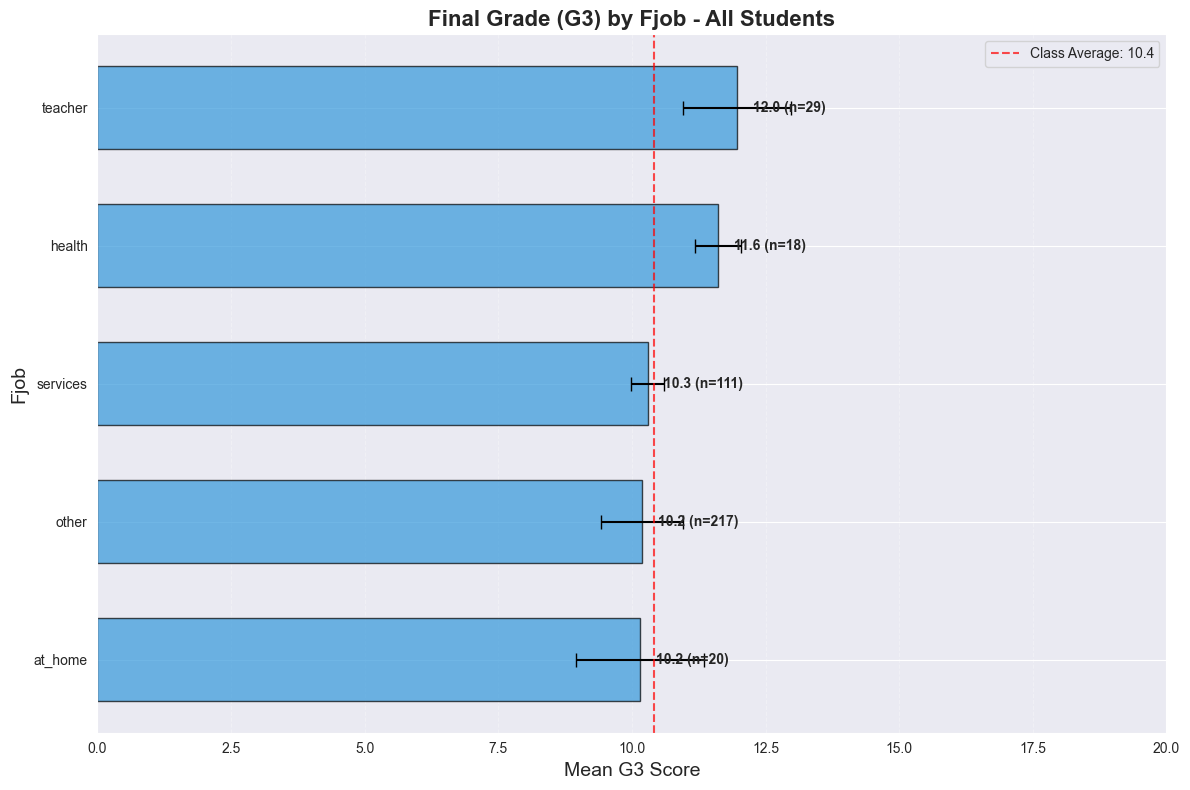

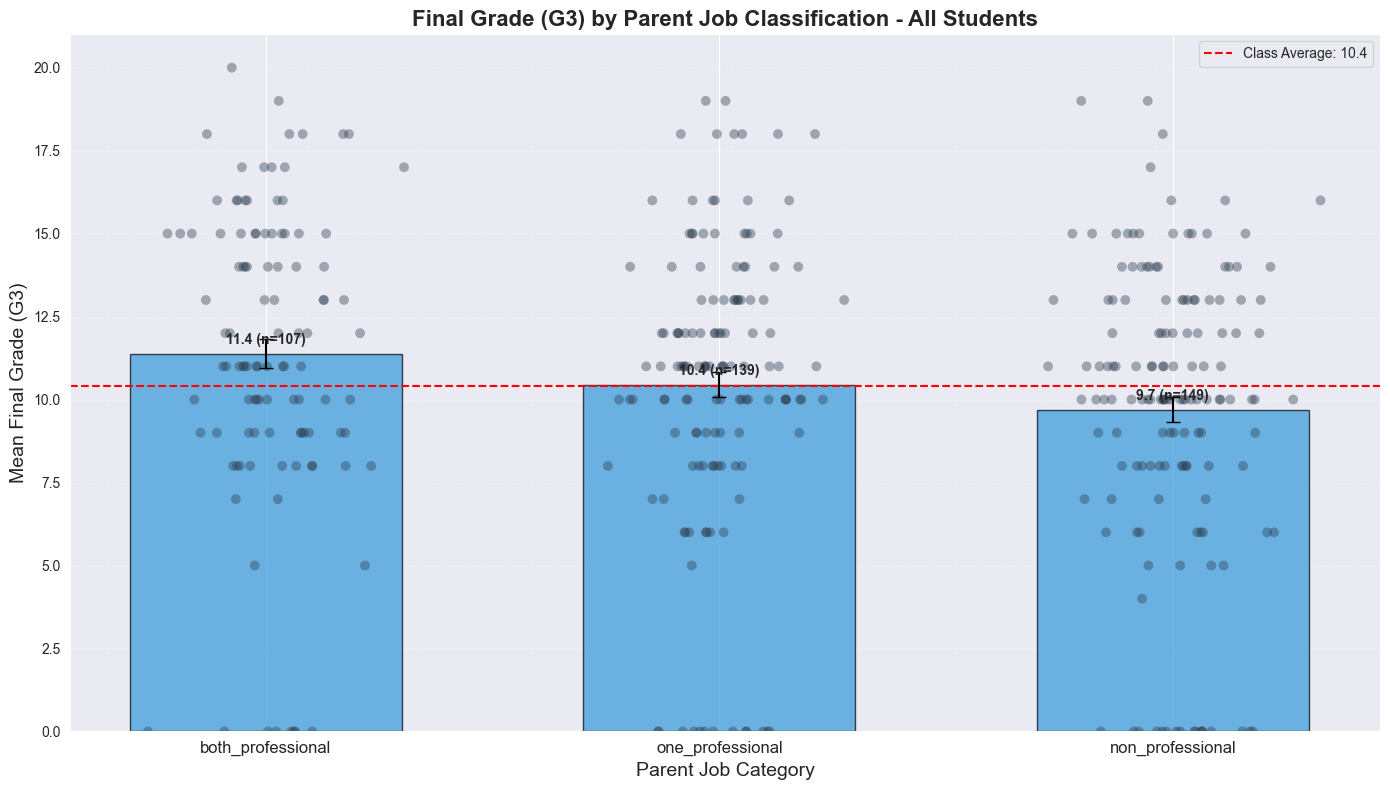


Mean G3 by Category - All Students:
Mean G3 by address:
address
U    10.674267
R     9.511364
Name: G3, dtype: float64

Mean G3 by famsize:
famsize
LE3    11.000000
GT3    10.177936
Name: G3, dtype: float64

Mean G3 by Pstatus:
Pstatus
A    11.195122
T    10.324859
Name: G3, dtype: float64

Mean G3 by sex:
sex
M    10.914439
F     9.966346
Name: G3, dtype: float64

Mean G3 by Mjob_agg:
Mjob_agg
healthcare    12.147059
education     11.051724
services      11.019417
other          9.822695
at_home        9.152542
Name: G3, dtype: float64

Mean G3 by Fjob_agg:
Fjob_agg
education     11.965517
healthcare    11.611111
services      10.297297
other         10.193548
at_home       10.150000
Name: G3, dtype: float64

Mean G3 by parent_job:
parent_job
both_professional    11.383178
one_professional     10.446043
non_professional      9.691275
Name: G3, dtype: float64


Correlation ratios (strength of relationship with G3) - All Students:
Mjob_agg: 0.1926
parent_job: 0.1469
Fjob_agg: 0.1148
ad

<Figure size 1200x800 with 0 Axes>

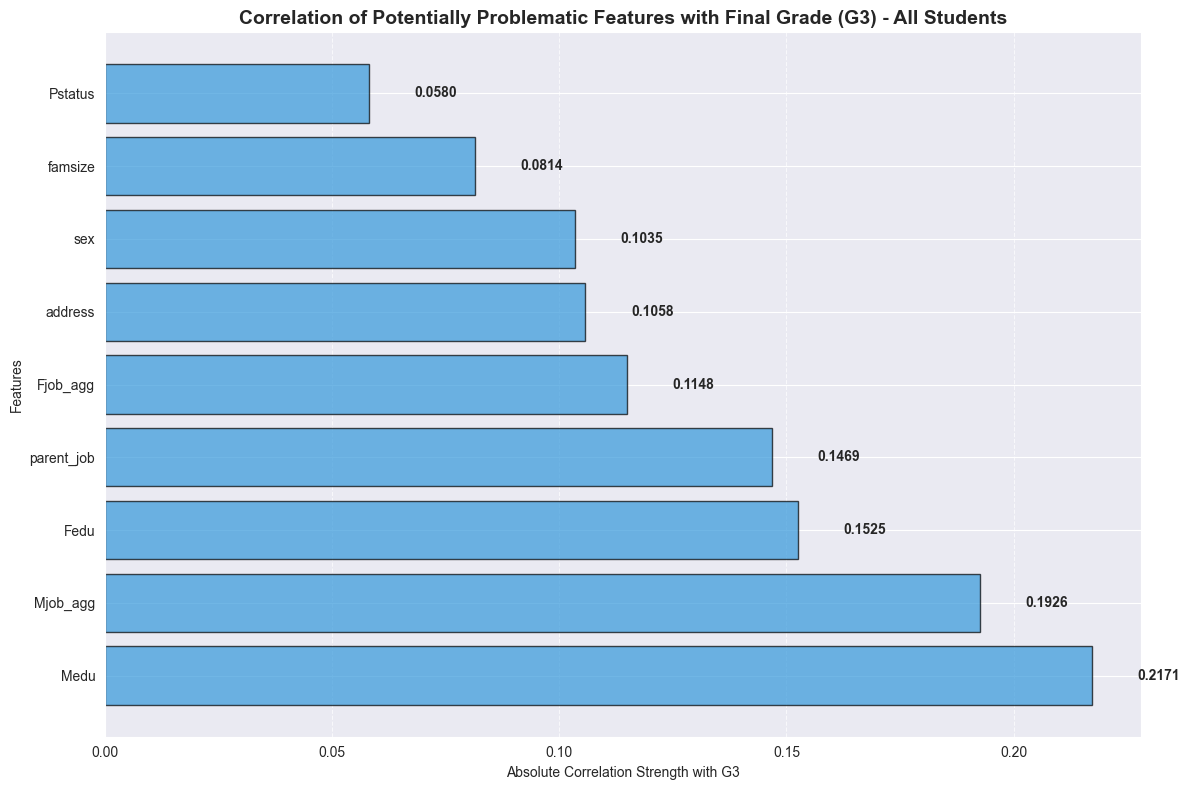


Problematic feature analysis completed for Full Dataset.
All visualizations have been saved with prefix: ''

Dataset Information for _GP_School:
<class 'pandas.core.frame.DataFrame'>
Index: 349 entries, 0 to 348
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       349 non-null    object 
 1   sex          349 non-null    object 
 2   age          337 non-null    float64
 3   address      349 non-null    object 
 4   famsize      349 non-null    object 
 5   Pstatus      349 non-null    object 
 6   Medu         349 non-null    int64  
 7   Fedu         349 non-null    int64  
 8   Mjob         349 non-null    object 
 9   Fjob         349 non-null    object 
 10  reason       349 non-null    object 
 11  guardian     349 non-null    object 
 12  traveltime   349 non-null    int64  
 13  studytime    349 non-null    int64  
 14  failures     349 non-null    int64  
 15  schoolsup    349 non-null    object

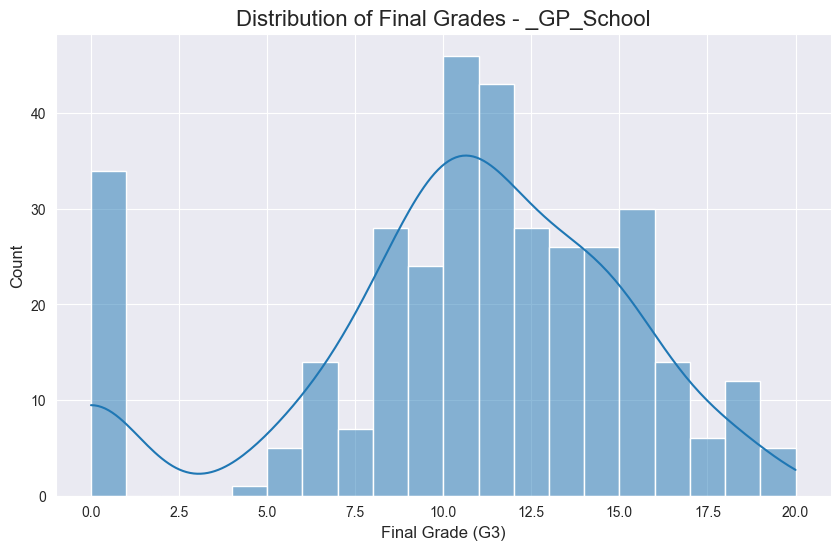

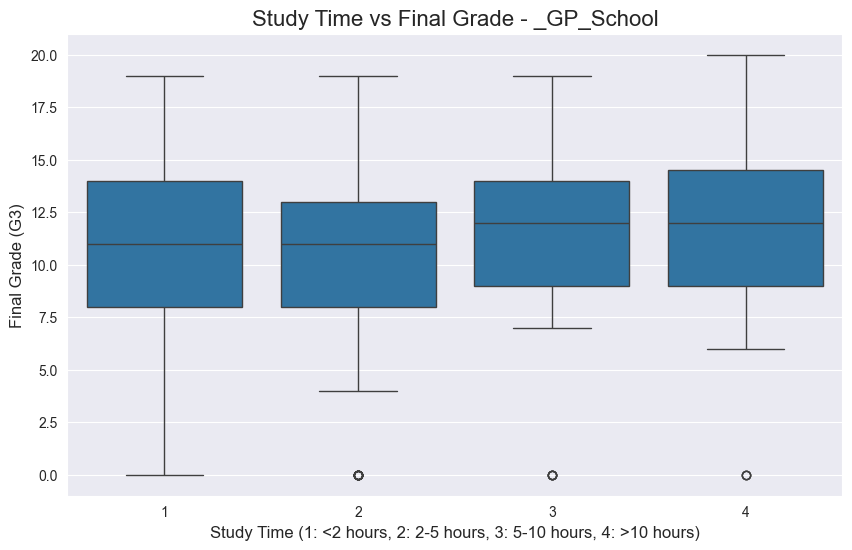

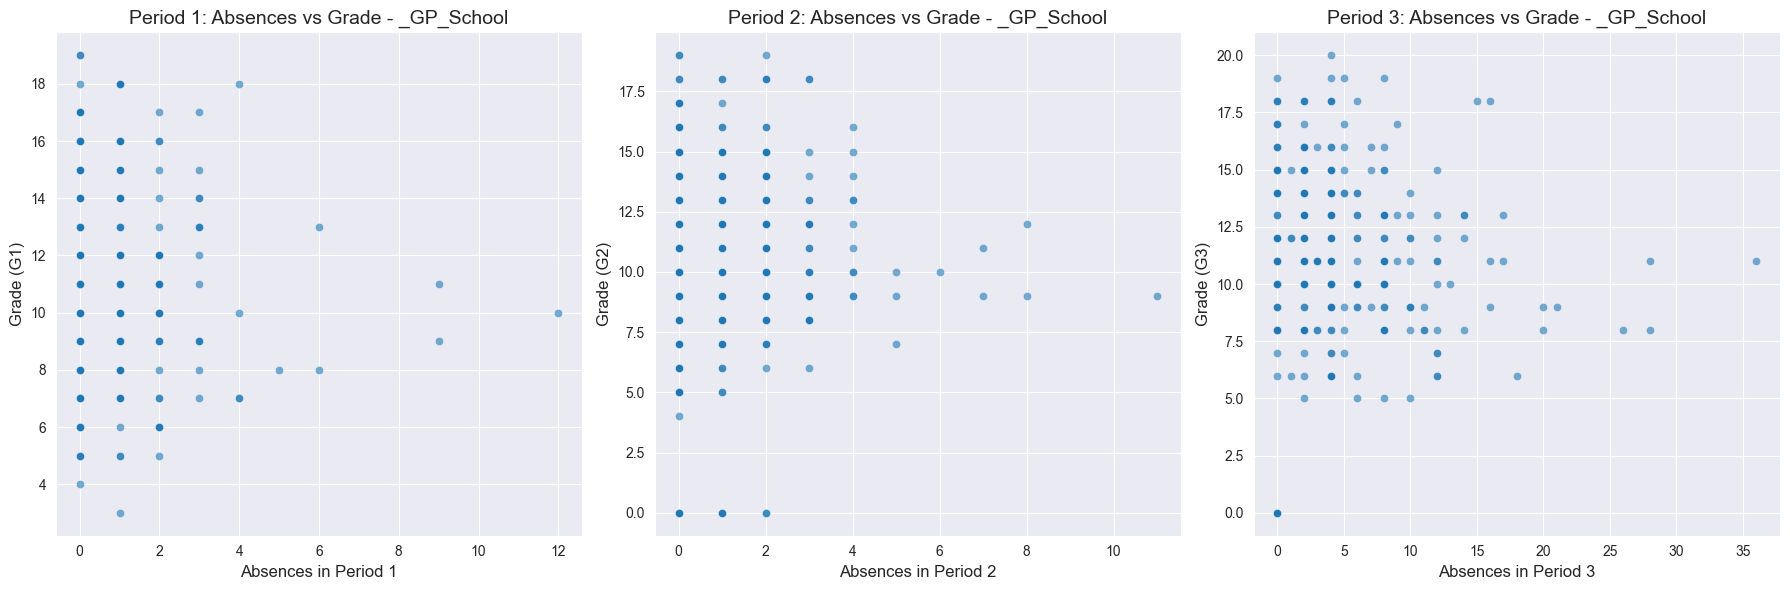

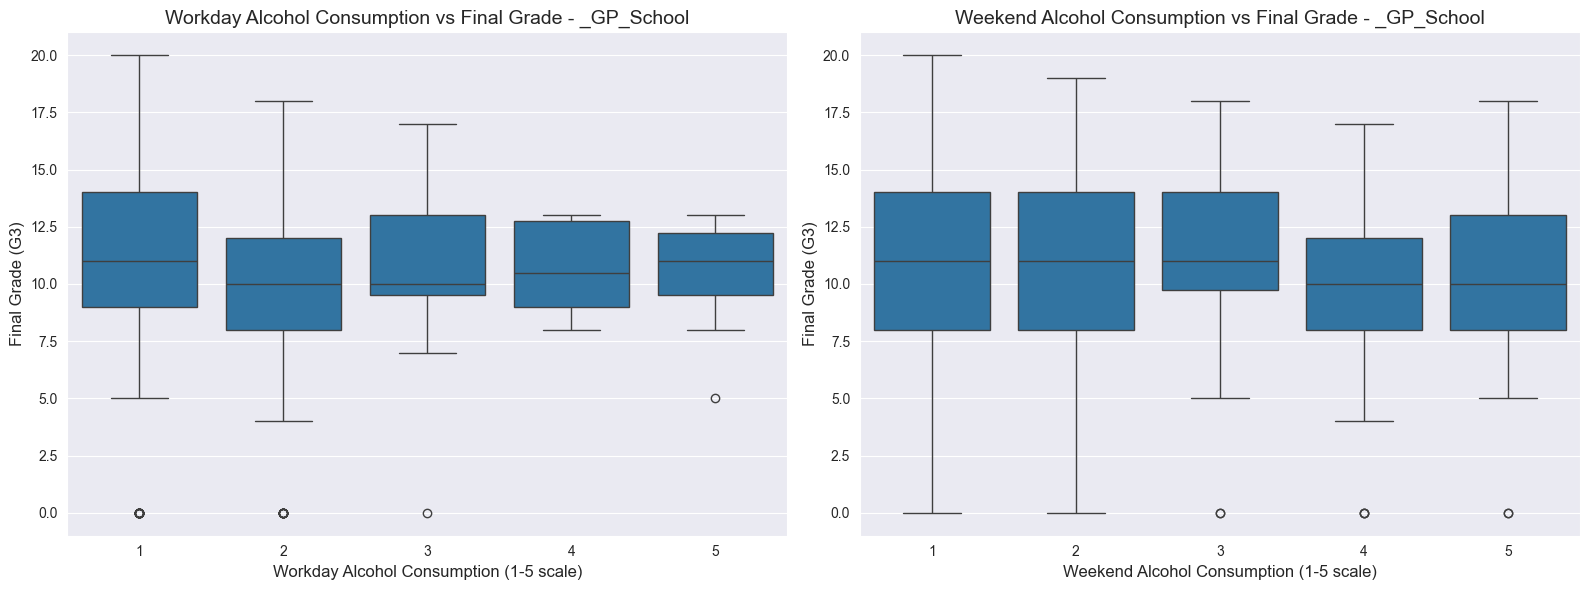

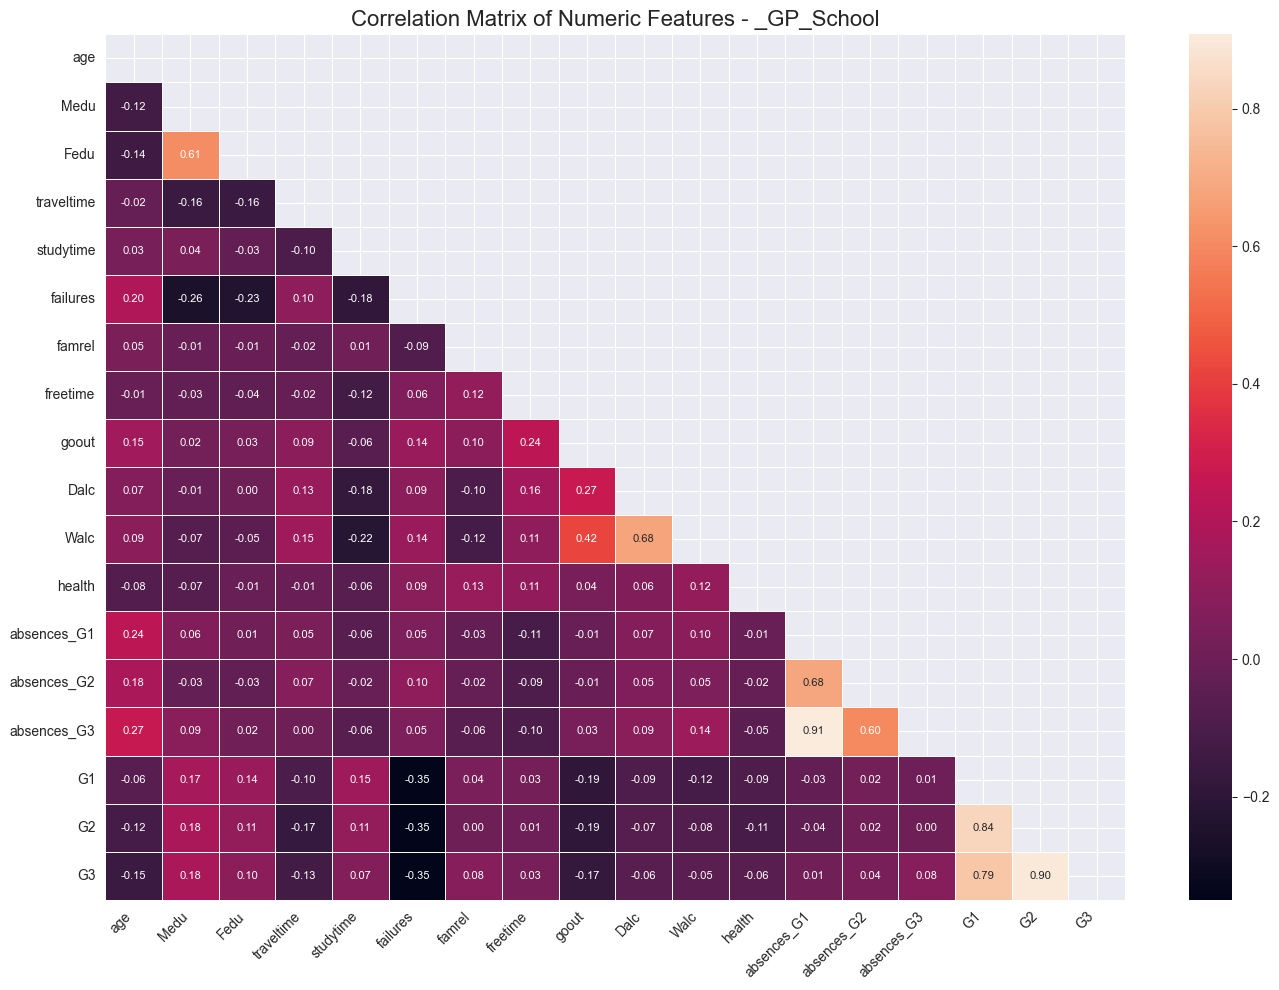

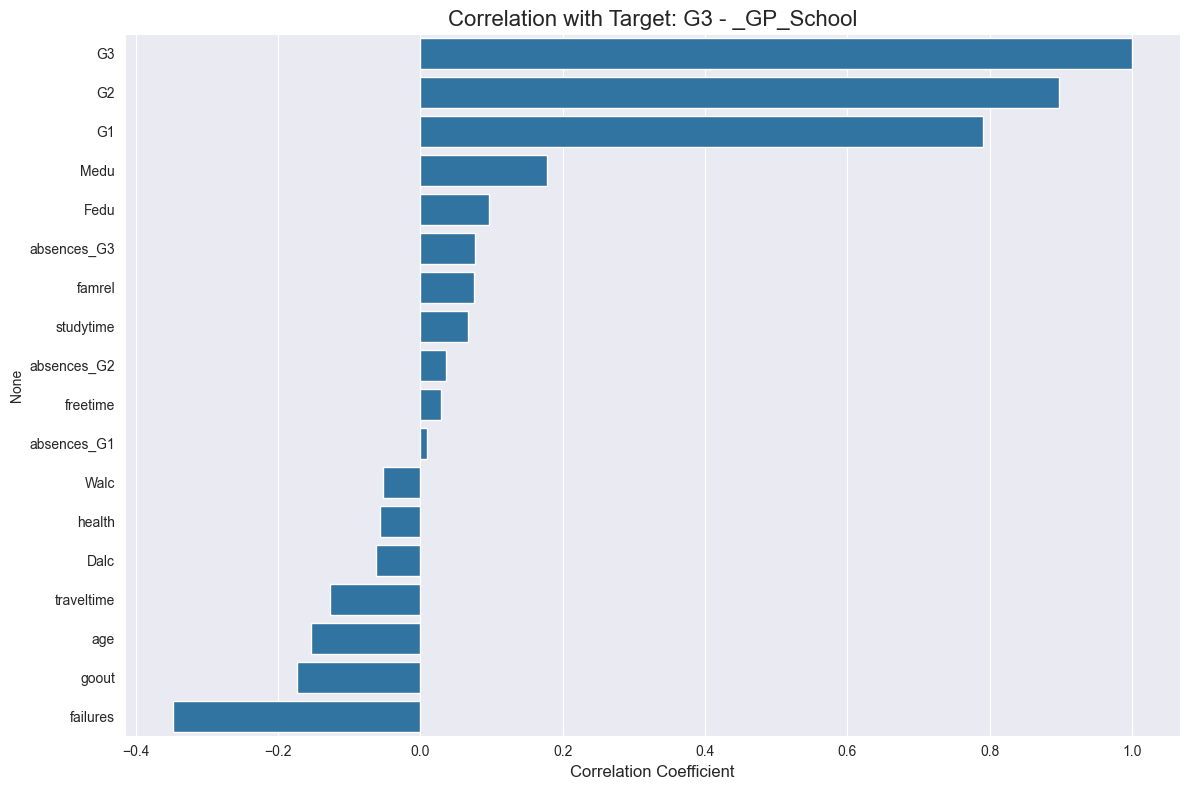

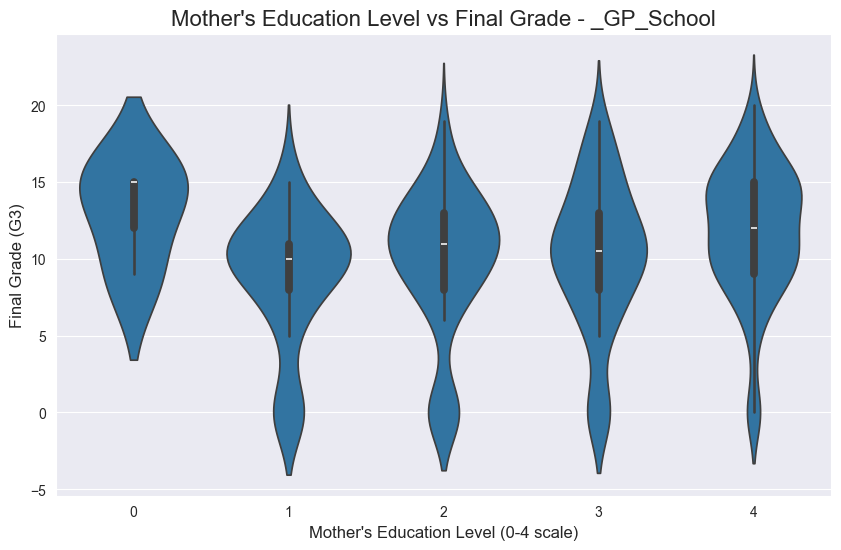

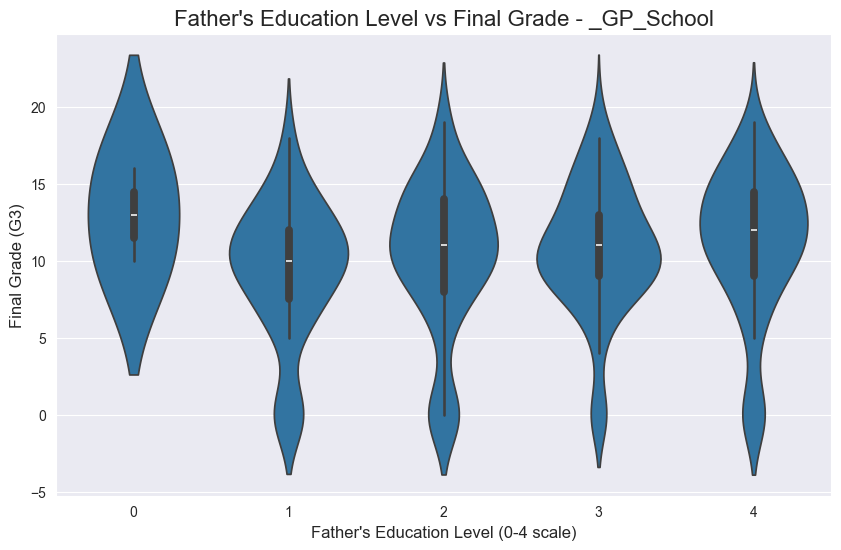

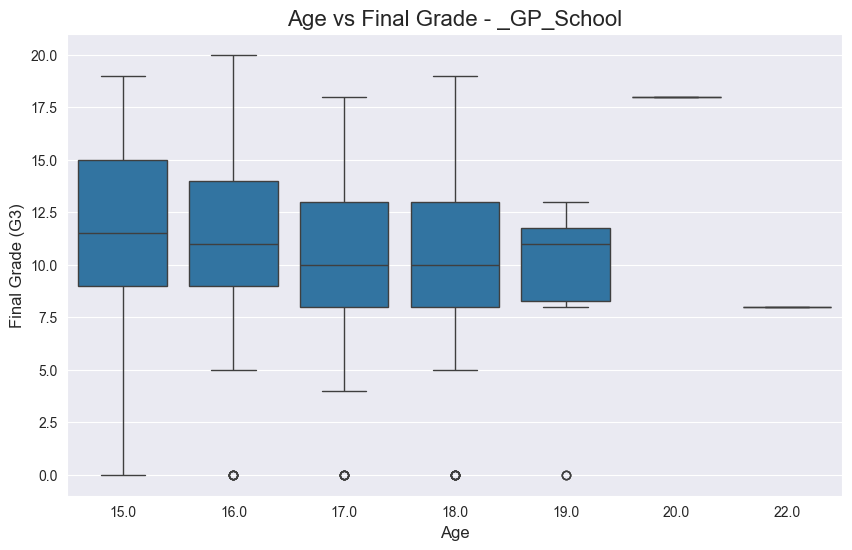

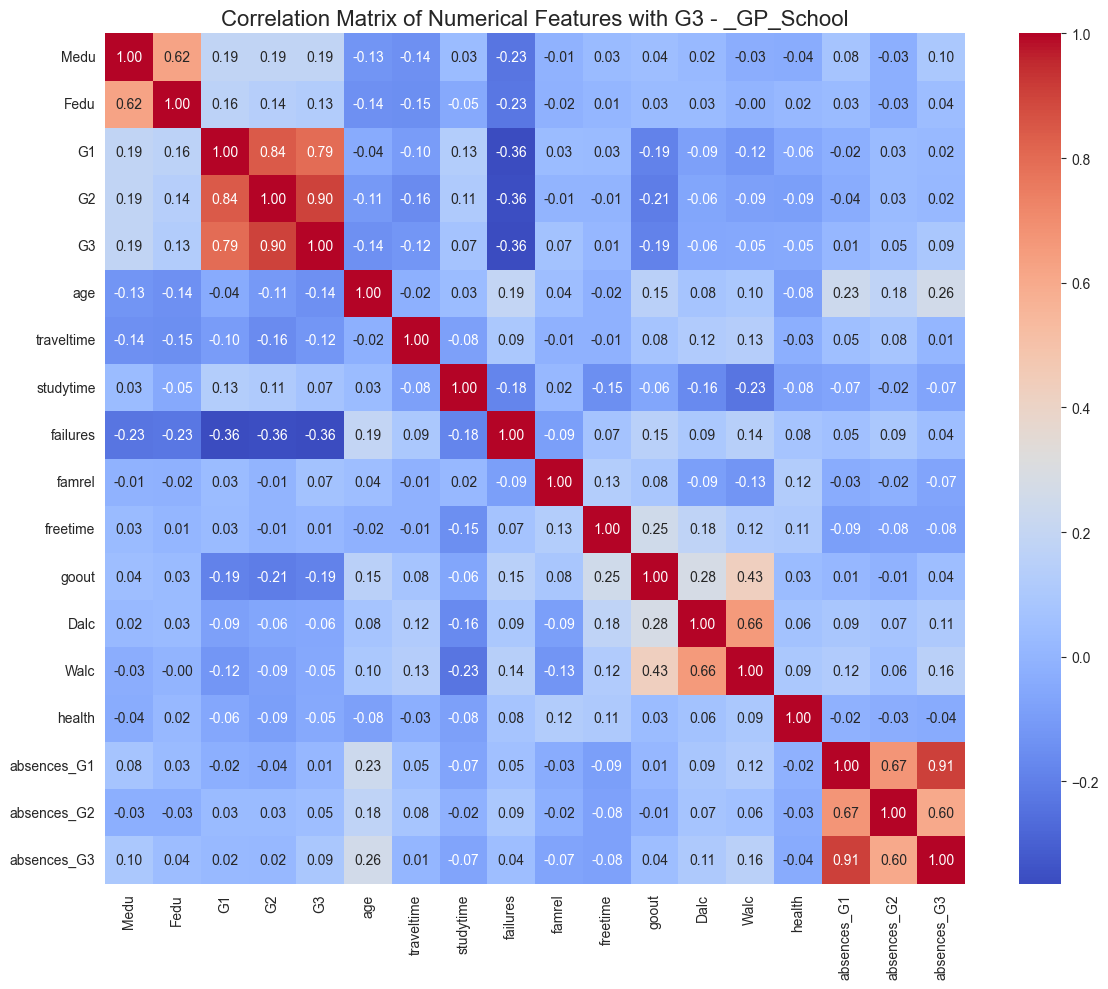

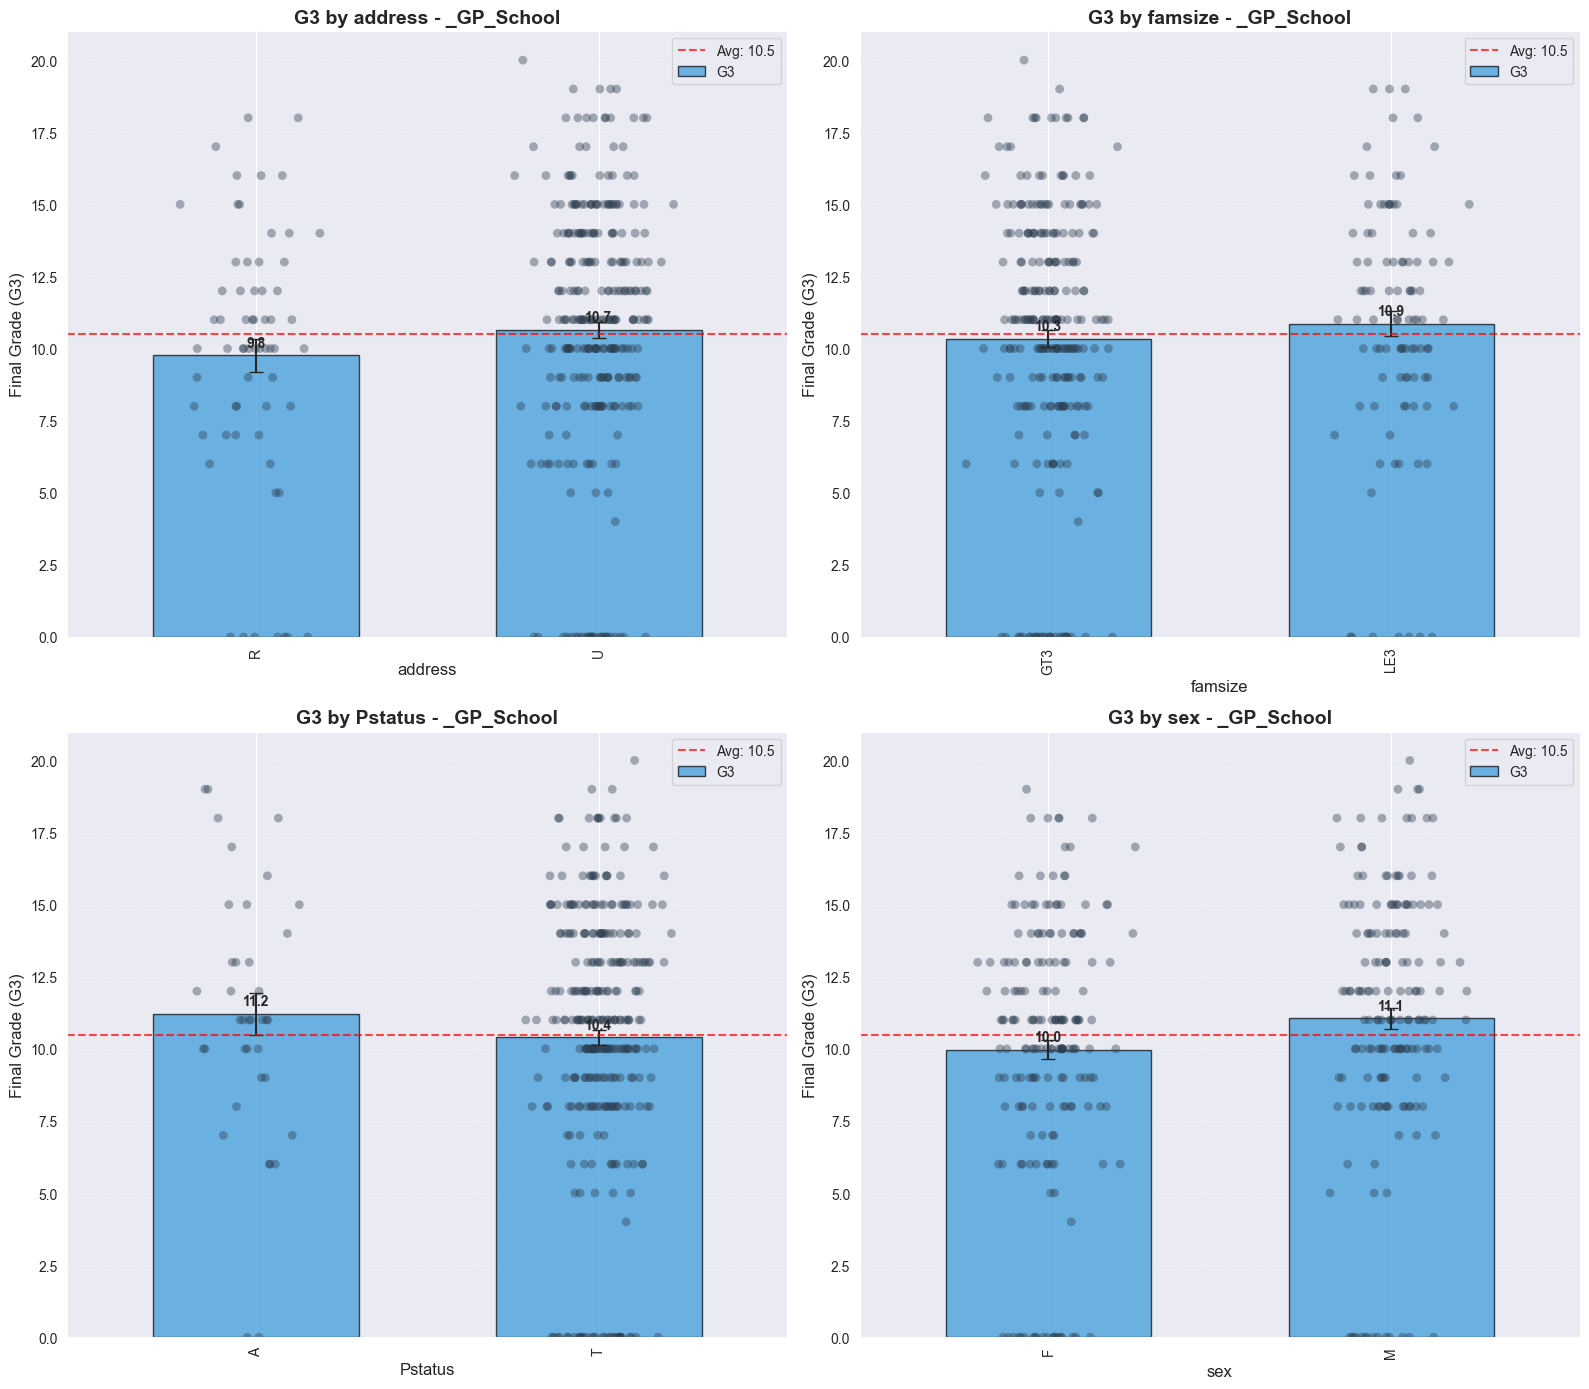

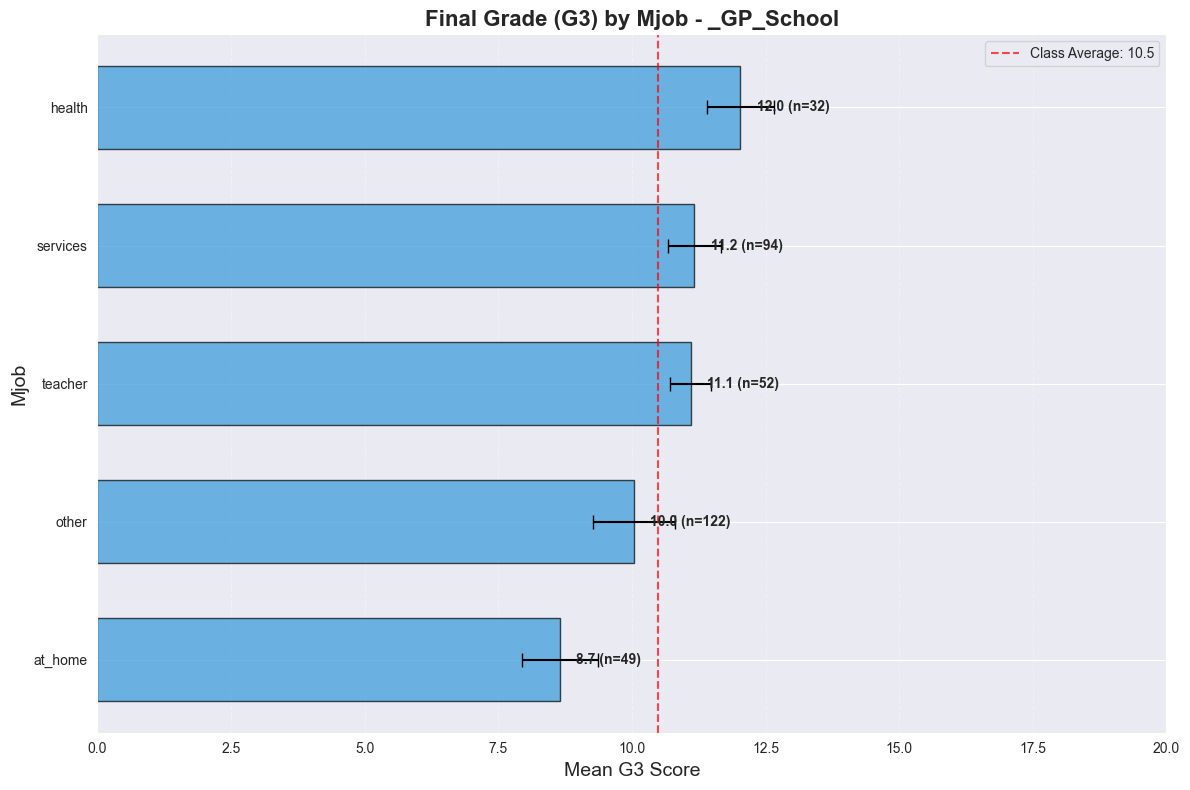

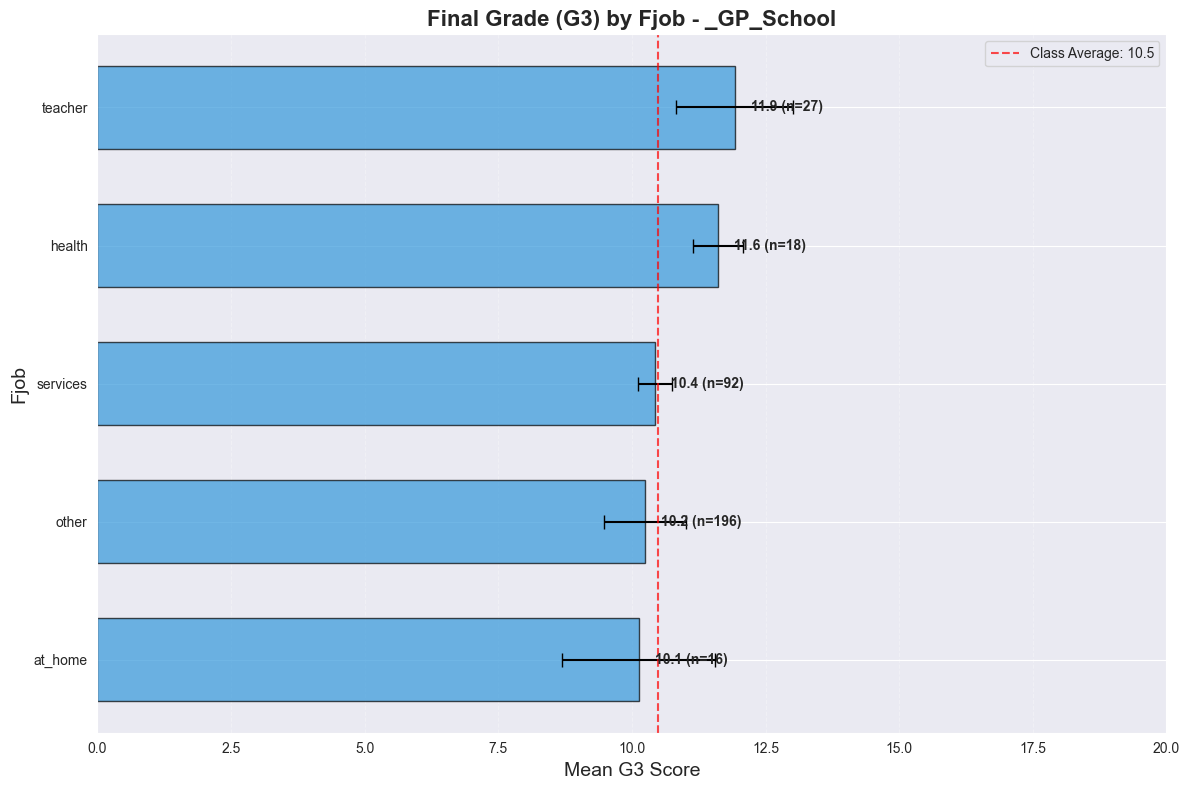

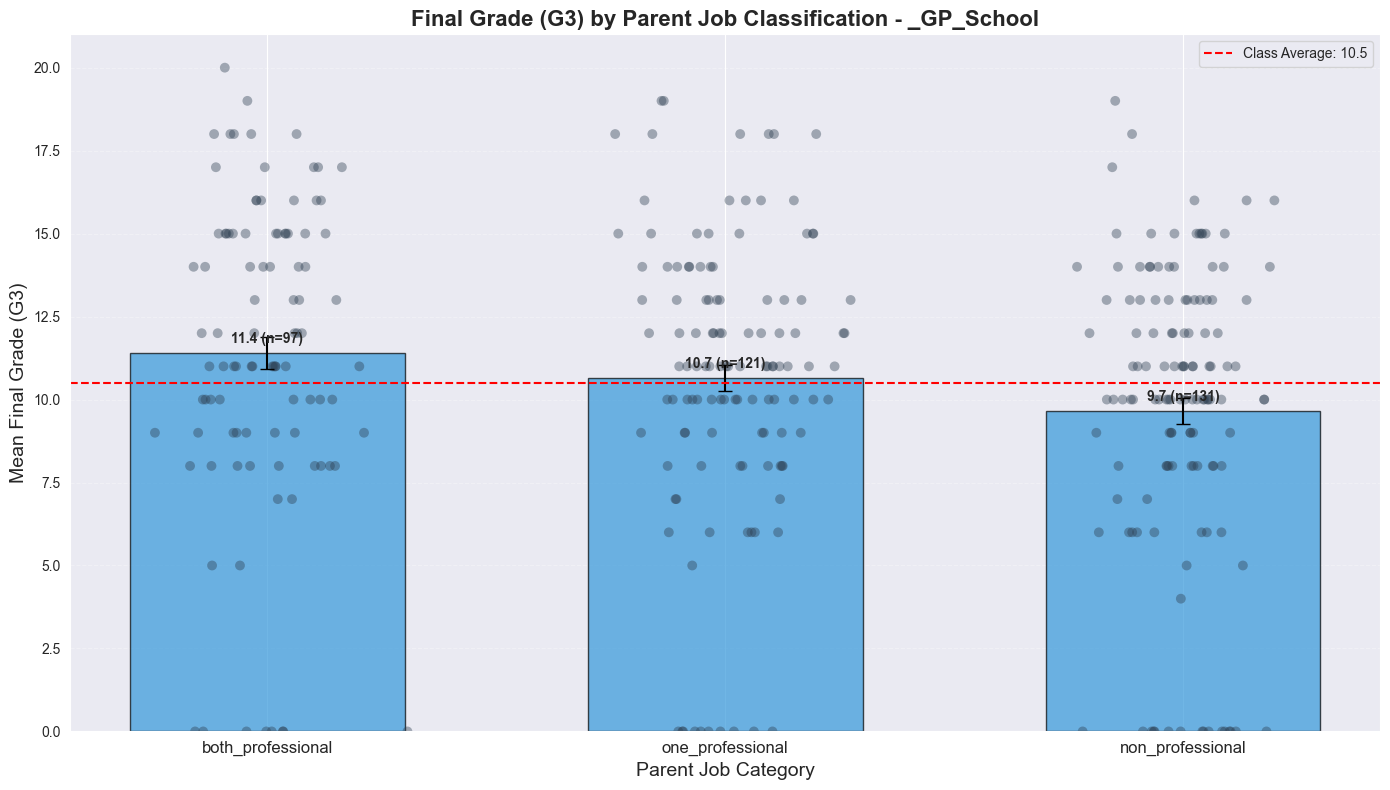


Mean G3 by Category - _GP_School:
Mean G3 by address:
address
U    10.650350
R     9.761905
Name: G3, dtype: float64

Mean G3 by famsize:
famsize
LE3    10.865979
GT3    10.345238
Name: G3, dtype: float64

Mean G3 by Pstatus:
Pstatus
A    11.210526
T    10.401929
Name: G3, dtype: float64

Mean G3 by sex:
sex
M    11.060241
F     9.972678
Name: G3, dtype: float64

Mean G3 by Mjob_agg:
Mjob_agg
healthcare    12.031250
services      11.170213
education     11.096154
other         10.040984
at_home        8.653061
Name: G3, dtype: float64

Mean G3 by Fjob_agg:
Fjob_agg
education     11.925926
healthcare    11.611111
services      10.434783
other         10.244898
at_home       10.125000
Name: G3, dtype: float64

Mean G3 by parent_job:
parent_job
both_professional    11.412371
one_professional     10.652893
non_professional      9.656489
Name: G3, dtype: float64


Correlation ratios (strength of relationship with G3) - _GP_School:
Mjob_agg: 0.2101
parent_job: 0.1541
sex: 0.1176
Fjob_agg: 0

<Figure size 1200x800 with 0 Axes>

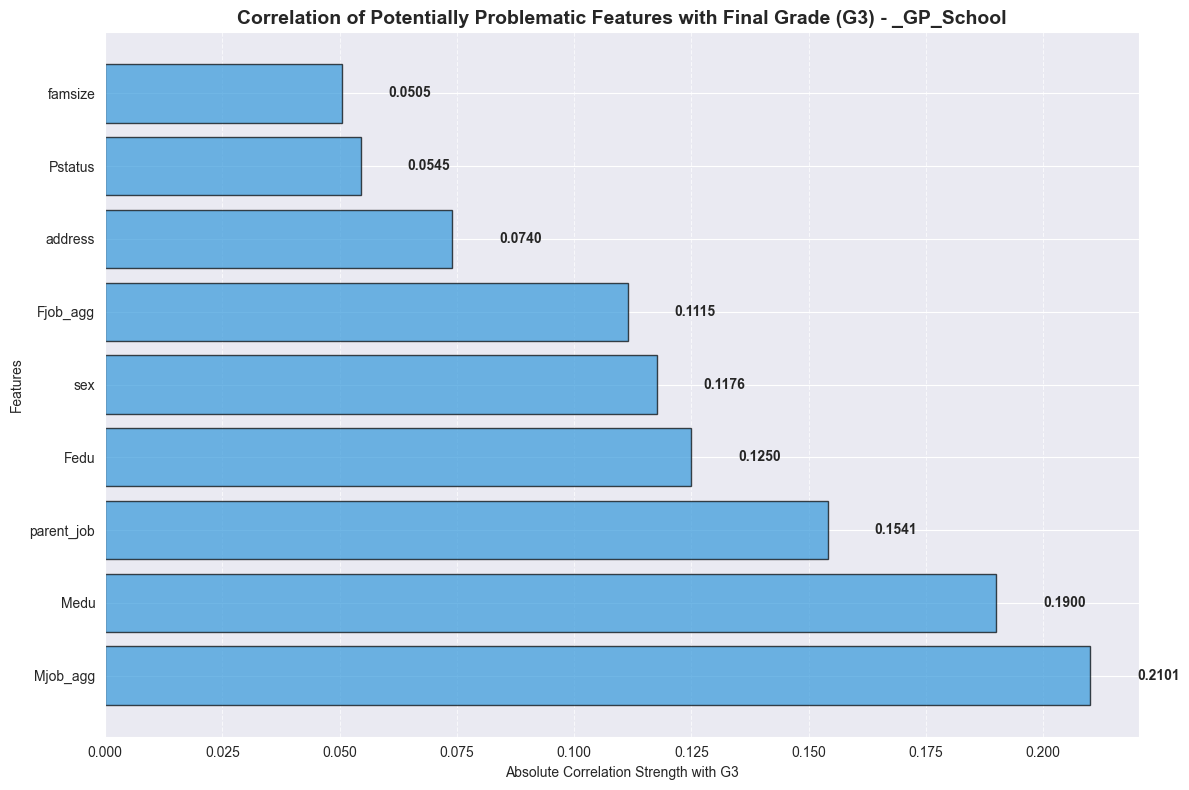


Problematic feature analysis completed for _GP_School.
All visualizations have been saved with prefix: '_GP_School'

Dataset Information for _MS_School:
<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 349 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       46 non-null     object 
 1   sex          46 non-null     object 
 2   age          46 non-null     float64
 3   address      46 non-null     object 
 4   famsize      46 non-null     object 
 5   Pstatus      46 non-null     object 
 6   Medu         46 non-null     int64  
 7   Fedu         46 non-null     int64  
 8   Mjob         46 non-null     object 
 9   Fjob         46 non-null     object 
 10  reason       46 non-null     object 
 11  guardian     46 non-null     object 
 12  traveltime   46 non-null     int64  
 13  studytime    46 non-null     int64  
 14  failures     46 non-null     int64  
 15  schoolsup    46 non-null  

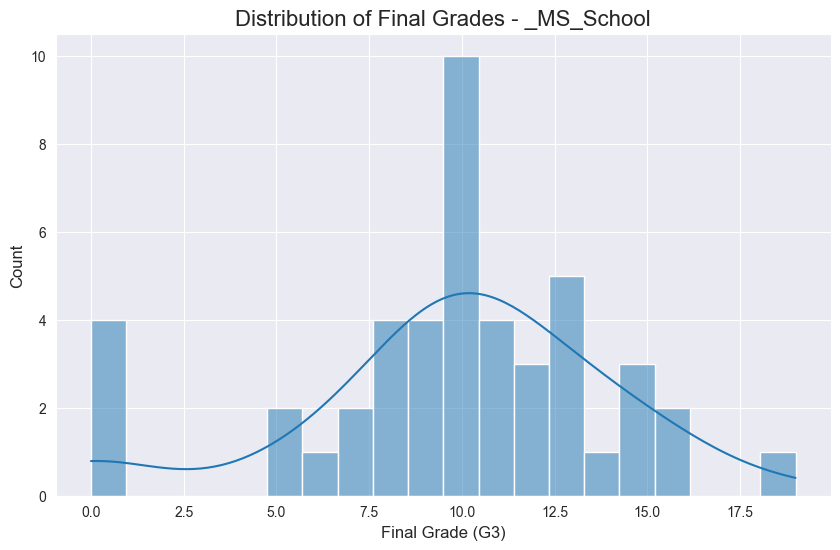

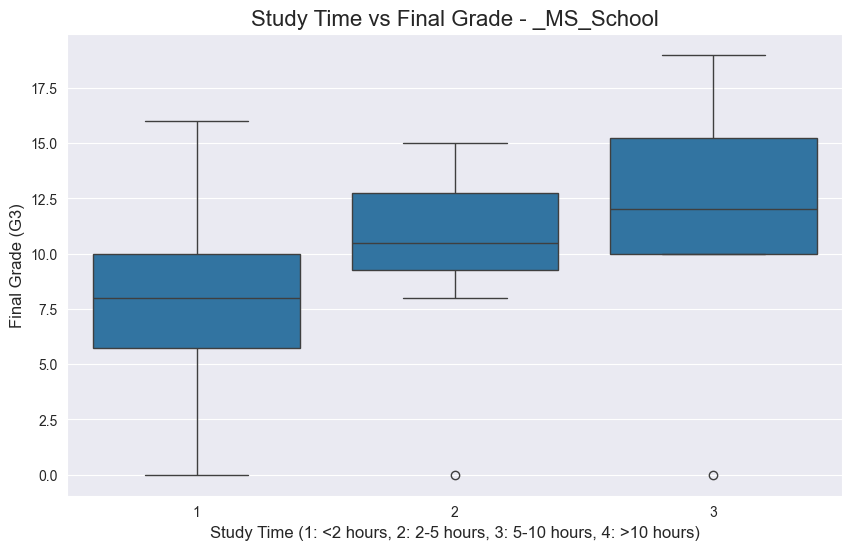

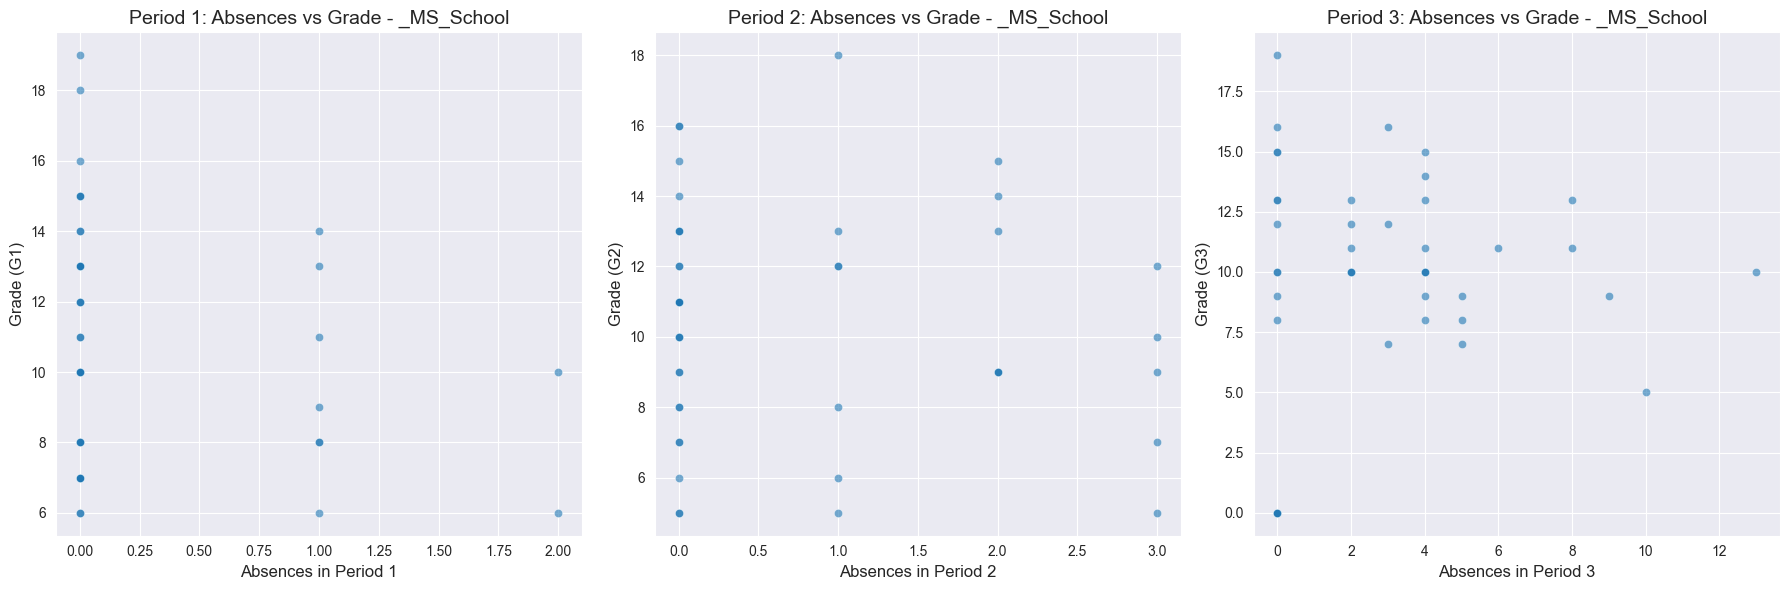

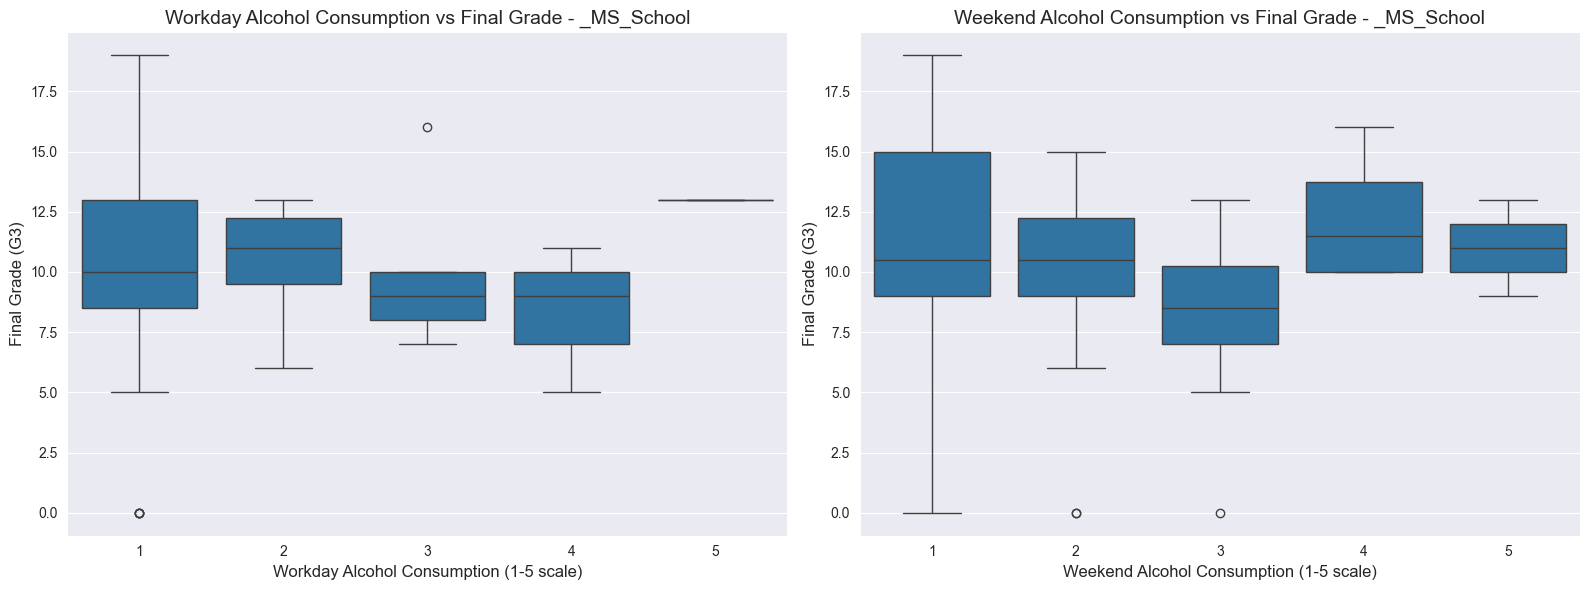

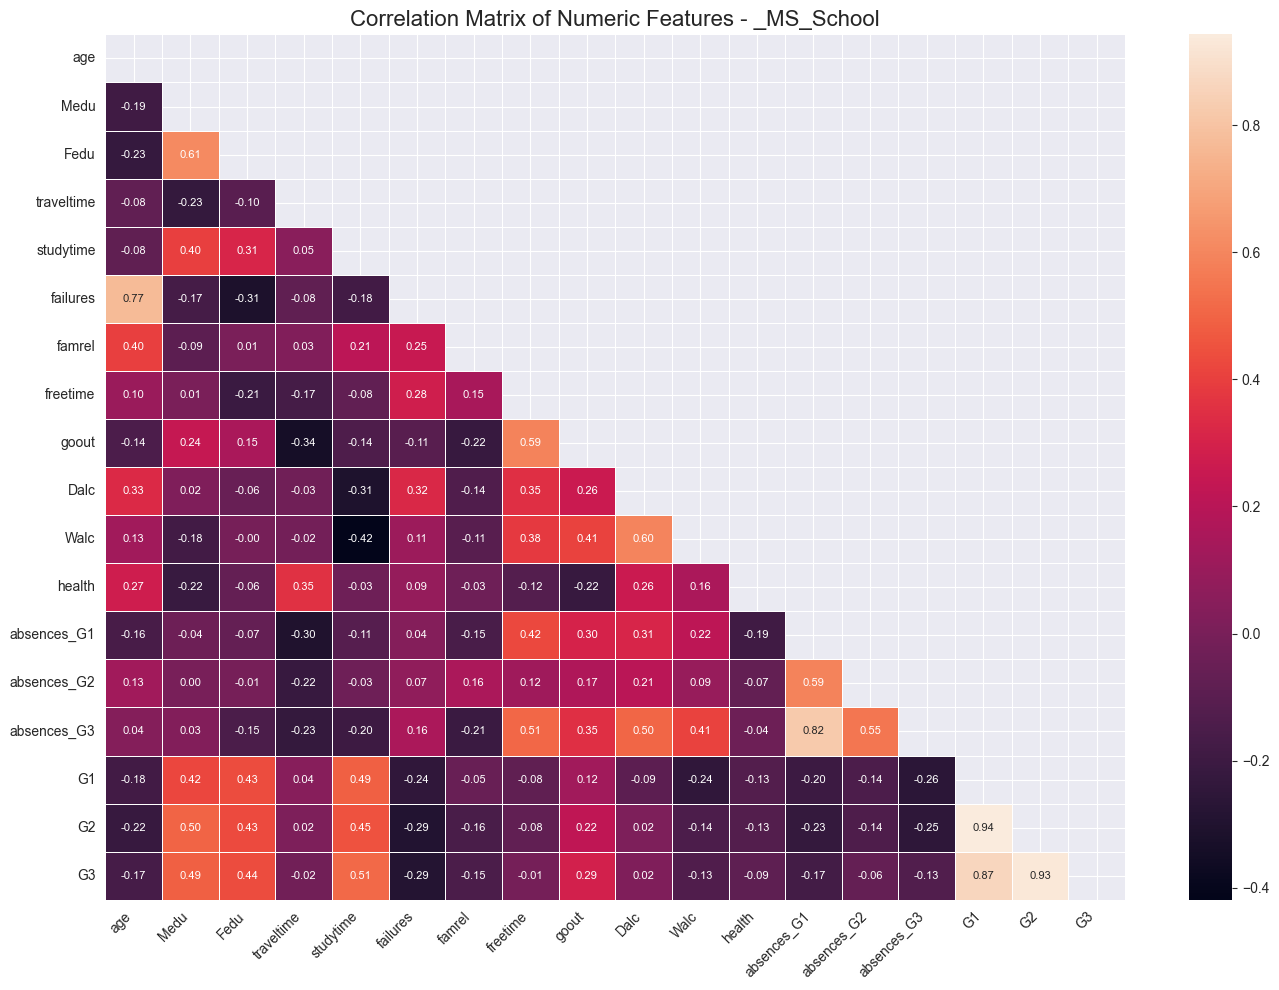

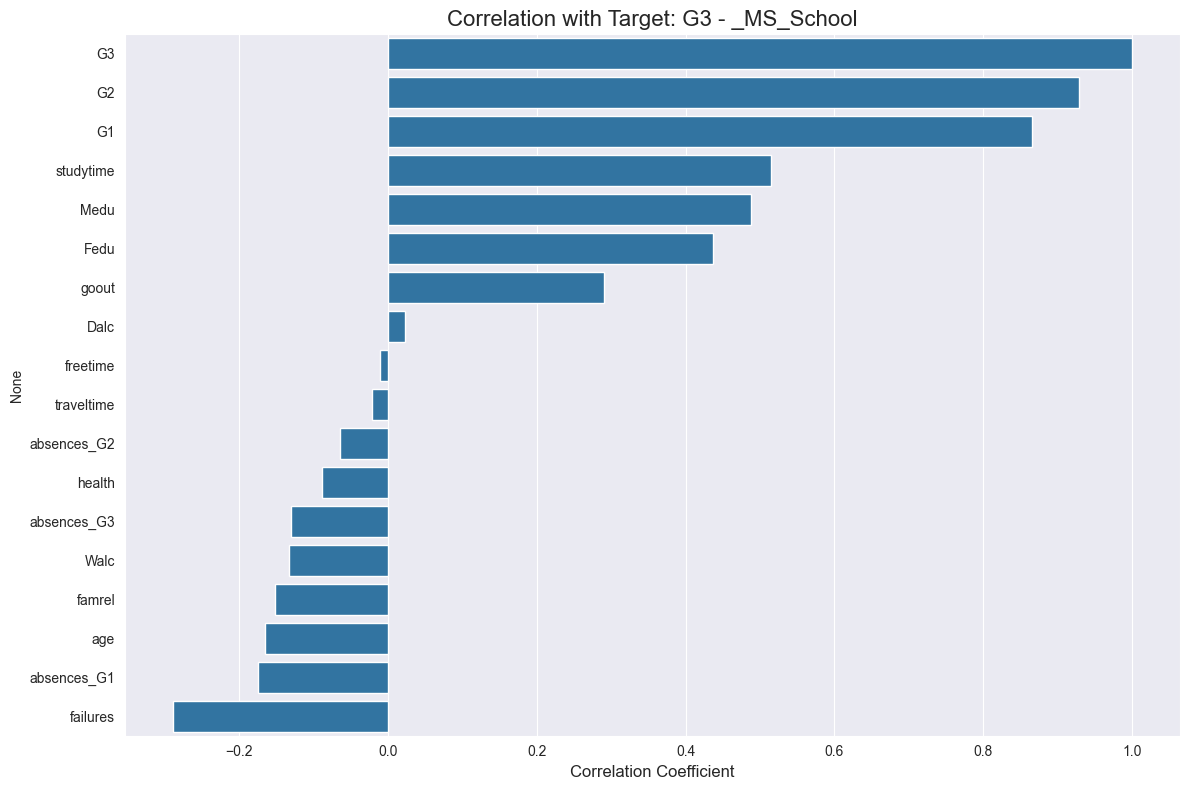

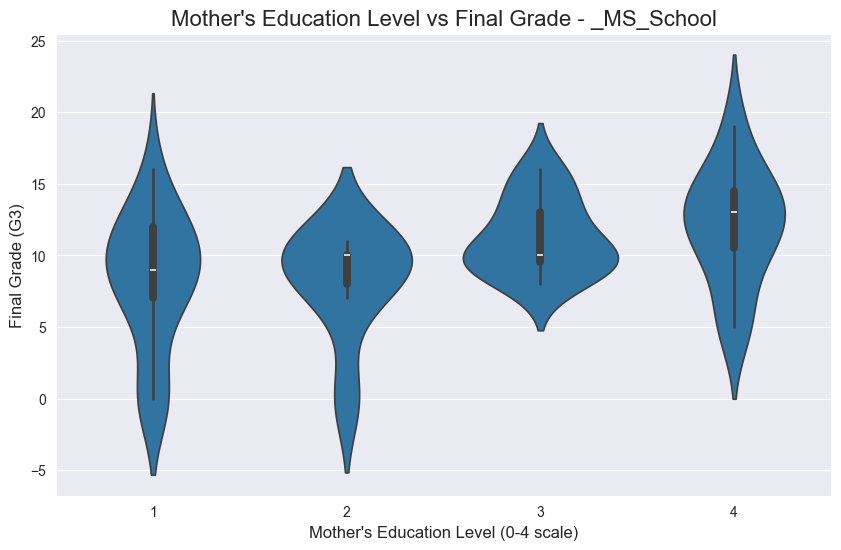

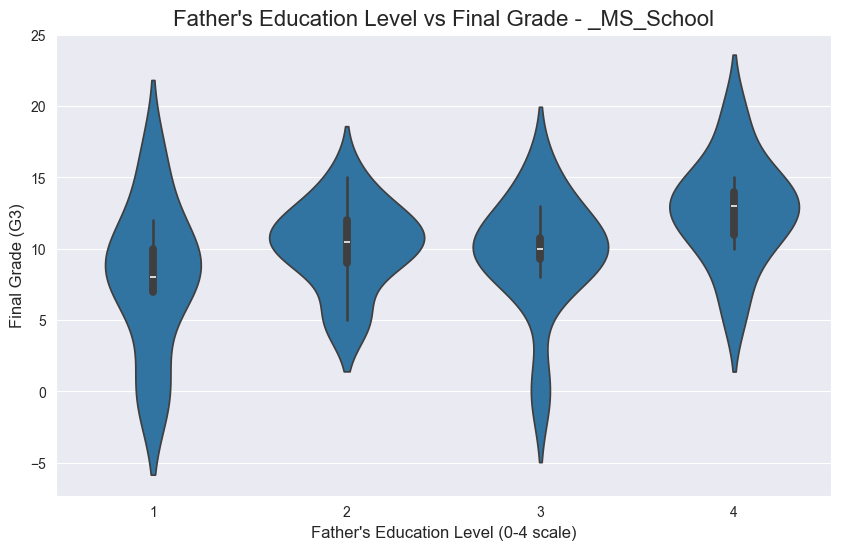

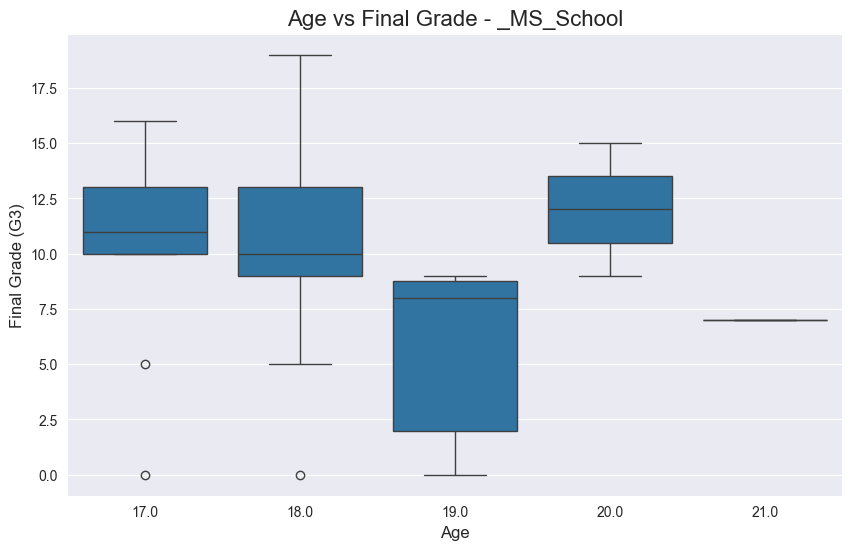

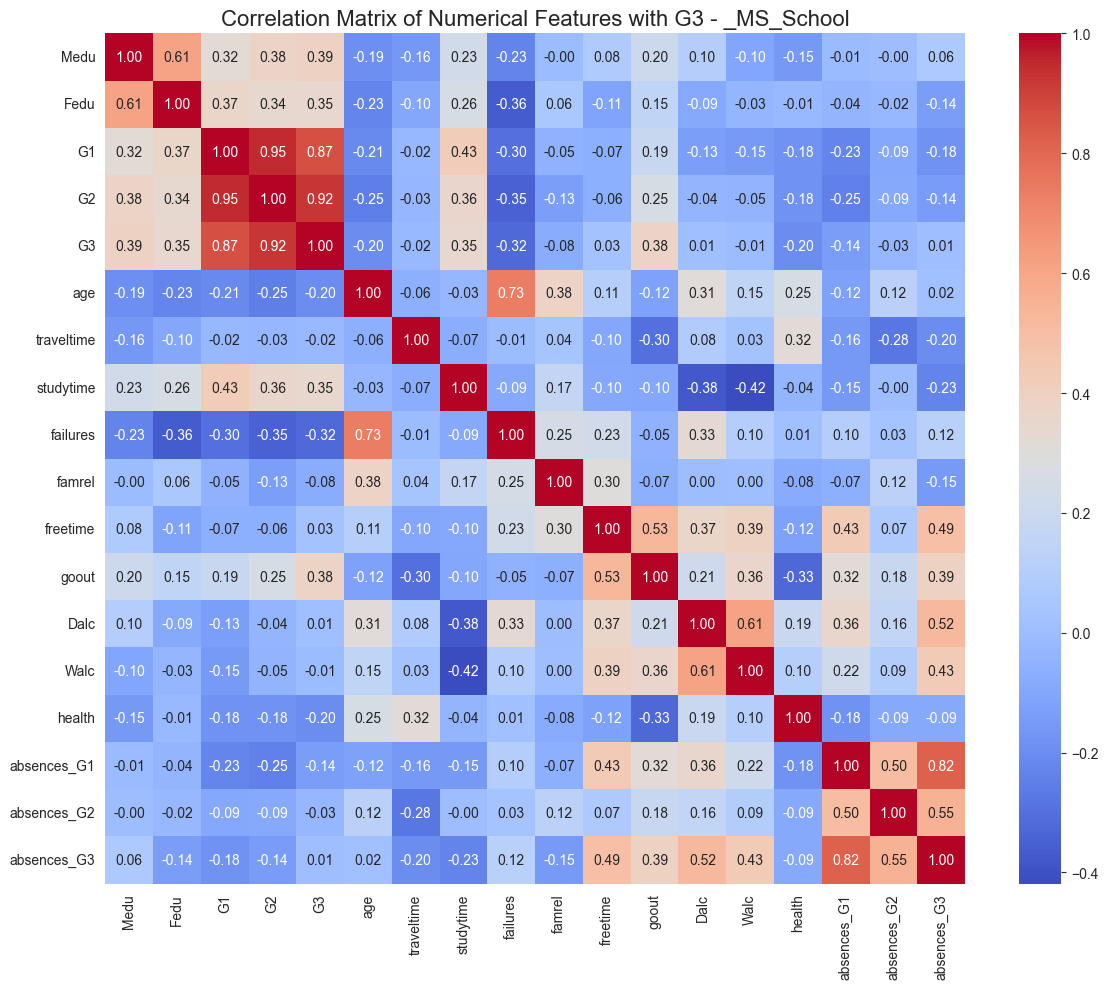

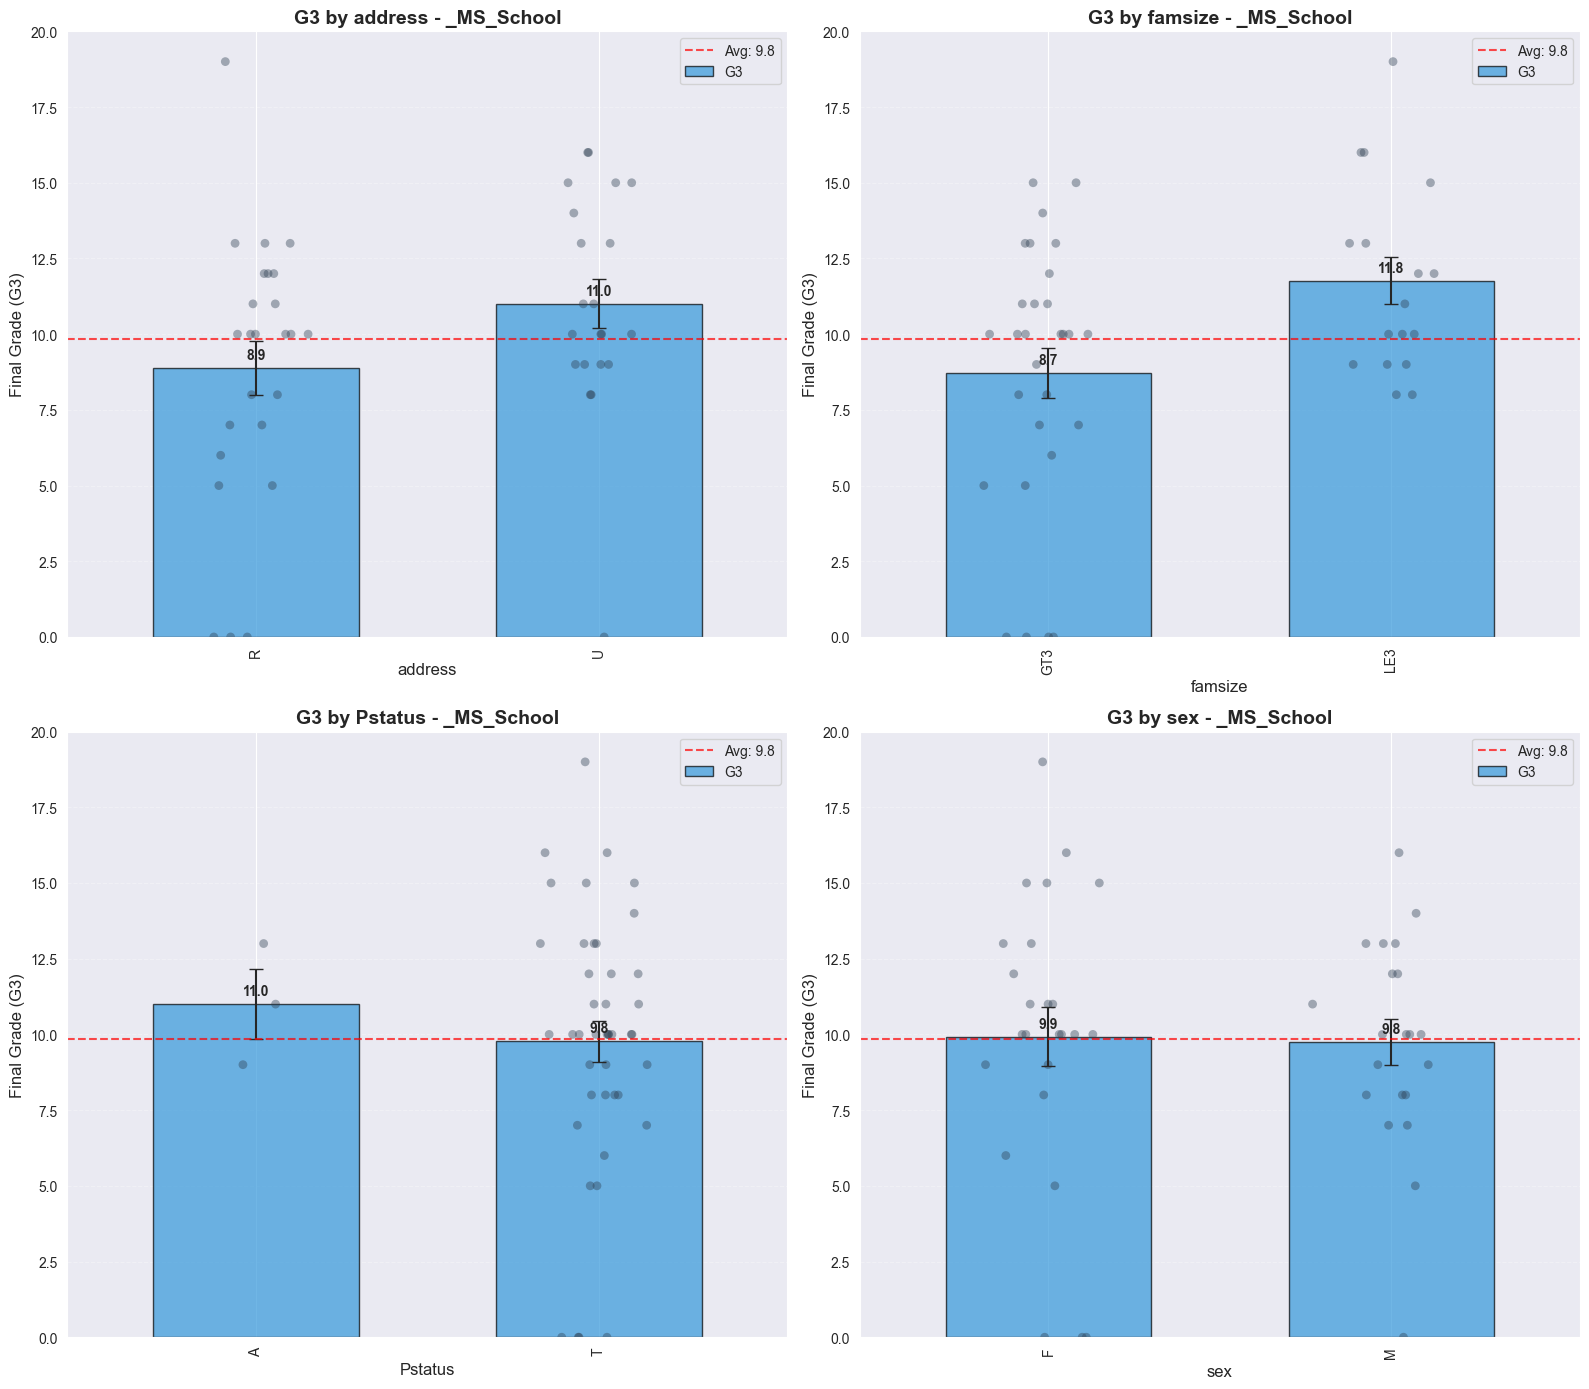

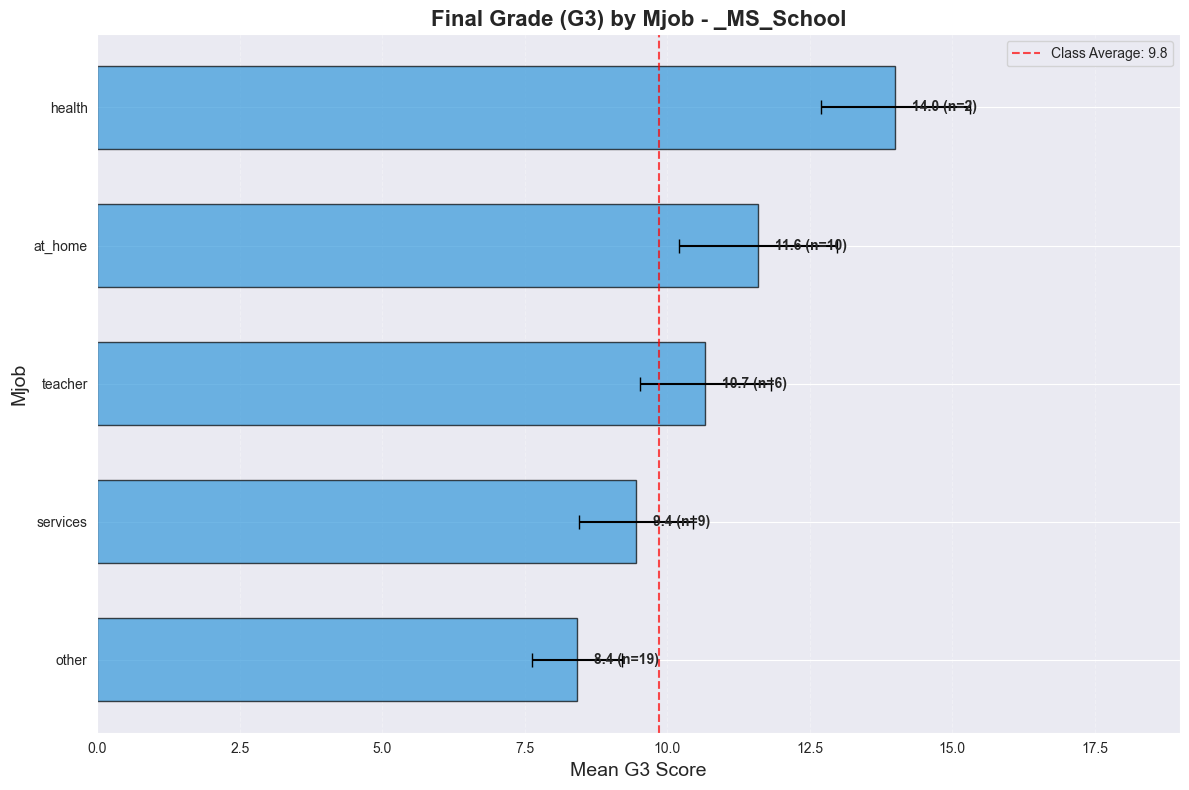

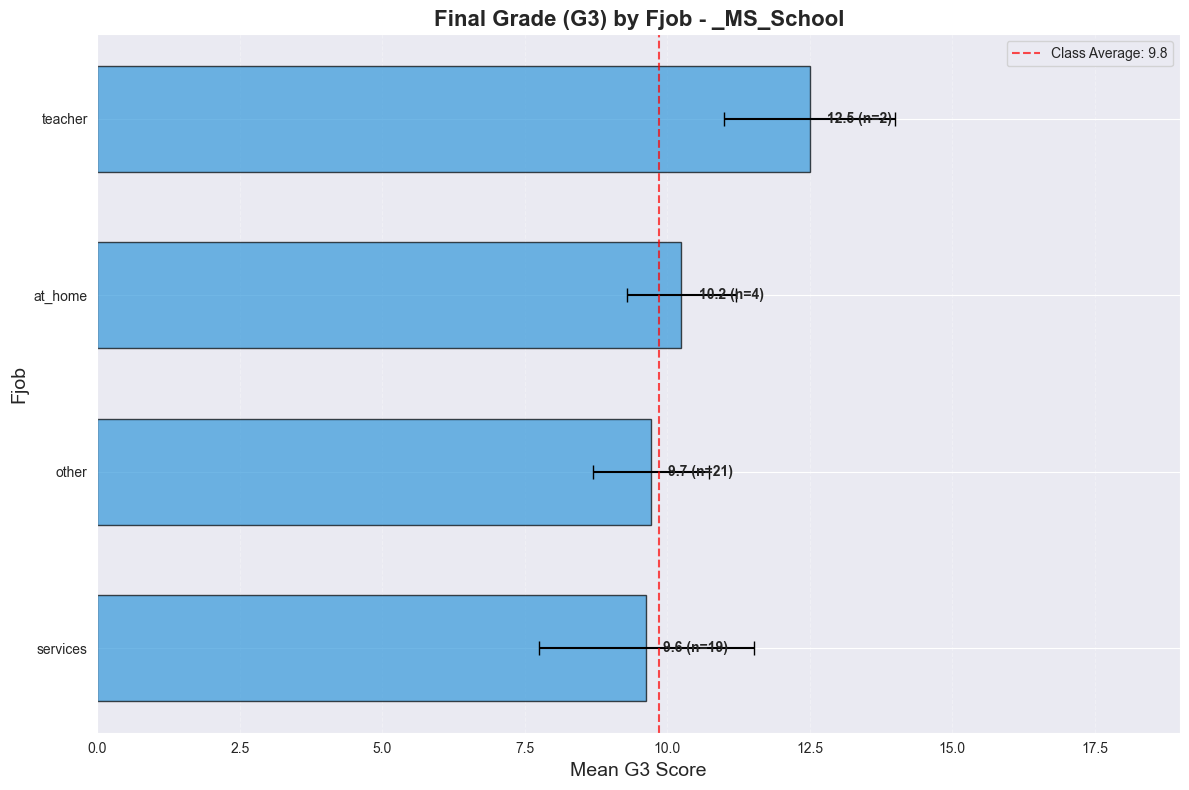

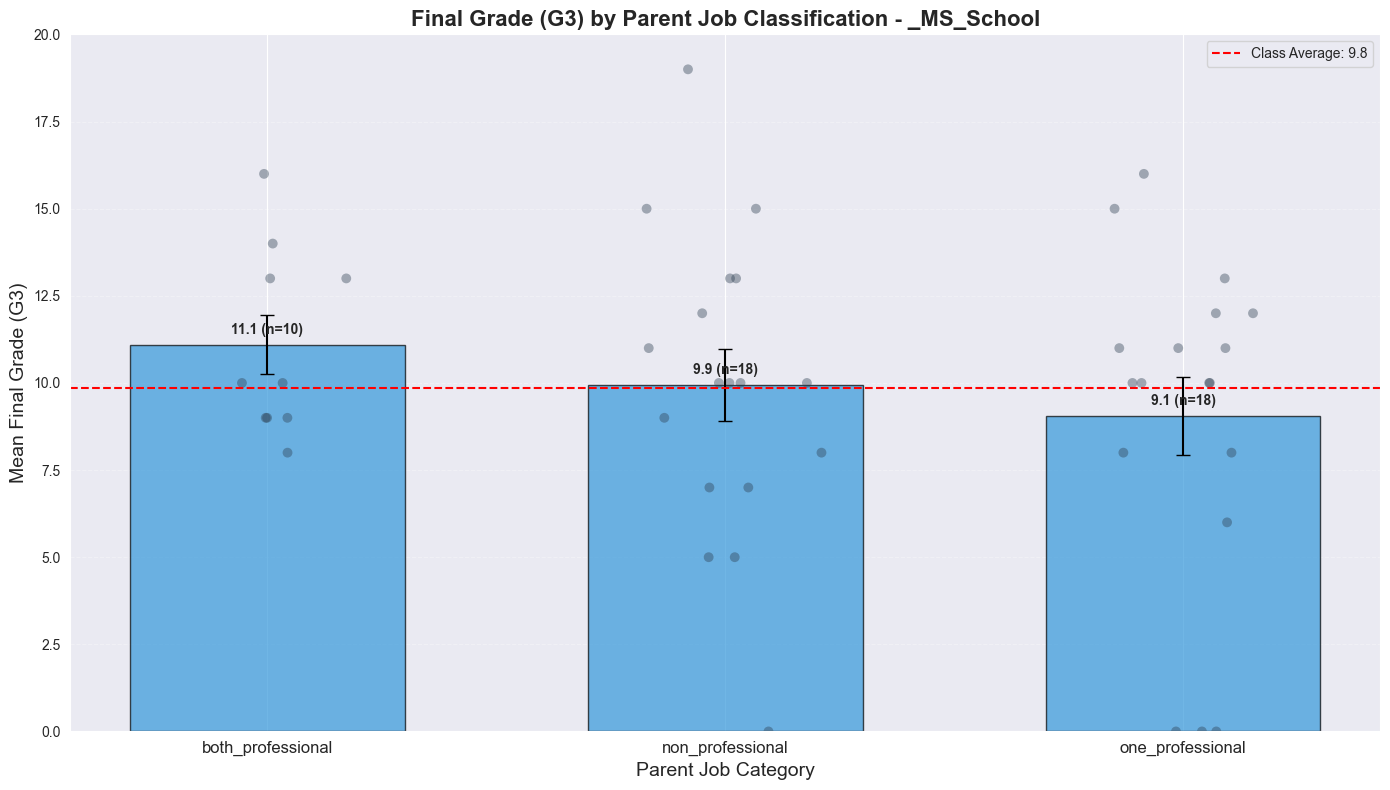


Mean G3 by Category - _MS_School:
Mean G3 by address:
address
U    11.00
R     8.88
Name: G3, dtype: float64

Mean G3 by famsize:
famsize
LE3    11.764706
GT3     8.724138
Name: G3, dtype: float64

Mean G3 by Pstatus:
Pstatus
A    11.000000
T     9.767442
Name: G3, dtype: float64

Mean G3 by sex:
sex
F    9.920000
M    9.761905
Name: G3, dtype: float64

Mean G3 by Mjob_agg:
Mjob_agg
healthcare    14.000000
at_home       11.600000
education     10.666667
services       9.444444
other          8.421053
Name: G3, dtype: float64

Mean G3 by Fjob_agg:
Fjob_agg
education    12.500000
at_home      10.250000
other         9.714286
services      9.631579
Name: G3, dtype: float64

Mean G3 by parent_job:
parent_job
both_professional    11.100000
non_professional      9.944444
one_professional      9.055556
Name: G3, dtype: float64


Correlation ratios (strength of relationship with G3) - _MS_School:
Mjob_agg: 0.3679
famsize: 0.3502
address: 0.2520
parent_job: 0.1833
Fjob_agg: 0.1406
Pstatus: 0.0

<Figure size 1200x800 with 0 Axes>

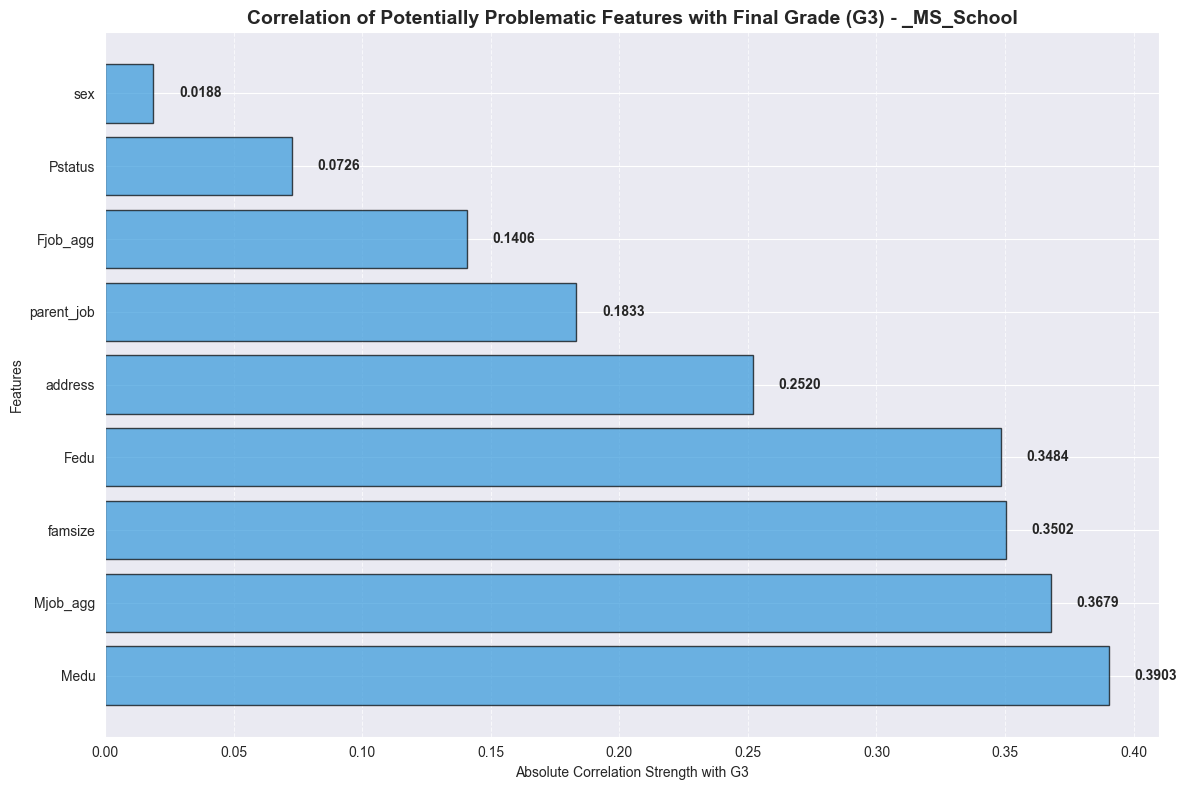


Problematic feature analysis completed for _MS_School.
All visualizations have been saved with prefix: '_MS_School'


In [92]:
def visualize_student_data(student_data, output_prefix='', show_visuals=False):
  
    #Use this to display information on the full dataset and splcied datatsets, use this to intuit features, model approach, and overall insights
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    sns.set_style('darkgrid')
    plt.rcParams['figure.figsize'] = (12, 8)
    
    #Print dataset information

    if output_prefix:
        print(f"\nDataset Information for {output_prefix}:")
    else:
        print('Full Dataset Information')
    print(student_data.info())
    print(student_data.describe())

    print("\nMissing Values:")
    print(student_data.isnull().sum())
    
    #===========================================================================
    #Basic visualizations
    #===========================================================================
    
    #Distribution of Final Grades (G3)
    plt.figure(figsize=(10, 6))
    sns.histplot(student_data['G3'], kde=True, bins=20)
    plt.title(f'Distribution of Final Grades - {output_prefix if output_prefix else "All Students"}', fontsize=16)
    plt.xlabel('Final Grade (G3)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.savefig(f'{output_prefix}final_grades_distribution.png')
    if show_visuals:
        plt.show()
    plt.close()

    #Study Time vs Final Grade
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='studytime', y='G3', data=student_data)
    plt.title(f'Study Time vs Final Grade - {output_prefix if output_prefix else "All Students"}', fontsize=16)
    plt.xlabel('Study Time (1: <2 hours, 2: 2-5 hours, 3: 5-10 hours, 4: >10 hours)', fontsize=12)
    plt.ylabel('Final Grade (G3)', fontsize=12)
    plt.savefig(f'{output_prefix}studytime_vs_grade.png')
    if show_visuals:
        plt.show()
    plt.close()

    #Absences vs Final Grade for each period
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    sns.scatterplot(x='absences_G1', y='G1', data=student_data, alpha=0.6, ax=axes[0])
    axes[0].set_title(f'Period 1: Absences vs Grade - {output_prefix if output_prefix else "All Students"}', fontsize=14)
    axes[0].set_xlabel('Absences in Period 1', fontsize=12)
    axes[0].set_ylabel('Grade (G1)', fontsize=12)
    
    sns.scatterplot(x='absences_G2', y='G2', data=student_data, alpha=0.6, ax=axes[1])
    axes[1].set_title(f'Period 2: Absences vs Grade - {output_prefix if output_prefix else "All Students"}', fontsize=14)
    axes[1].set_xlabel('Absences in Period 2', fontsize=12)
    axes[1].set_ylabel('Grade (G2)', fontsize=12)
    
    sns.scatterplot(x='absences_G3', y='G3', data=student_data, alpha=0.6, ax=axes[2])
    axes[2].set_title(f'Period 3: Absences vs Grade - {output_prefix if output_prefix else "All Students"}', fontsize=14)
    axes[2].set_xlabel('Absences in Period 3', fontsize=12)
    axes[2].set_ylabel('Grade (G3)', fontsize=12)
    
    plt.tight_layout()
    plt.savefig(f'{output_prefix}absences_vs_grades.png')
    if show_visuals:
        plt.show()
    plt.close()

    #Alcohol Consumption vs Final Grade
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    sns.boxplot(x='Dalc', y='G3', data=student_data, ax=ax1)
    ax1.set_title(f'Workday Alcohol Consumption vs Final Grade - {output_prefix if output_prefix else "All Students"}', fontsize=14)
    ax1.set_xlabel('Workday Alcohol Consumption (1-5 scale)', fontsize=12)
    ax1.set_ylabel('Final Grade (G3)', fontsize=12)
    
    sns.boxplot(x='Walc', y='G3', data=student_data, ax=ax2)
    ax2.set_title(f'Weekend Alcohol Consumption vs Final Grade - {output_prefix if output_prefix else "All Students"}', fontsize=14)
    ax2.set_xlabel('Weekend Alcohol Consumption (1-5 scale)', fontsize=12)
    ax2.set_ylabel('Final Grade (G3)', fontsize=12)
    
    plt.tight_layout()
    plt.savefig(f'{output_prefix}alcohol_vs_grade.png')
    if show_visuals:
        plt.show()
    plt.close()

    #Correlation Analysis
    
    numeric_data = student_data.select_dtypes(include=[np.number])
    numeric_data = numeric_data.dropna()

    #Calculate the correlation matrix
    correlation_matrix = numeric_data.corr()

    #Create a heatmap of the correlation matrix
    plt.figure(figsize=(14, 10))
    mask = np.triu(correlation_matrix)
    heatmap = sns.heatmap(correlation_matrix, 
                         mask=mask,
                         annot=True, 
                         linewidths=0.5, 
                         fmt='.2f',
                         annot_kws={'size': 8})
    plt.title(f'Correlation Matrix of Numeric Features - {output_prefix if output_prefix else "All Students"}', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'{output_prefix}correlation_matrix.png')
    if show_visuals:
        plt.show()
    plt.close()

    #Focused correlation with the target variable (G3)
    plt.figure(figsize=(12, 8))
    target_corr = correlation_matrix['G3'].sort_values(ascending=False)
    sns.barplot(x=target_corr.values, y=target_corr.index)
    plt.title(f'Correlation with Target: G3 - {output_prefix if output_prefix else "All Students"}', fontsize=16)
    plt.xlabel('Correlation Coefficient', fontsize=12)
    plt.tight_layout()
    plt.savefig(f'{output_prefix}target_correlation.png')
    if show_visuals:
        plt.show()
    plt.close()

    #Educational background analysis
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Medu', y='G3', data=student_data)
    plt.title(f"Mother's Education Level vs Final Grade - {output_prefix if output_prefix else 'All Students'}", fontsize=16)
    plt.xlabel("Mother's Education Level (0-4 scale)", fontsize=12)
    plt.ylabel('Final Grade (G3)', fontsize=12)
    plt.savefig(f'{output_prefix}mother_education_vs_grade.png')
    if show_visuals:
        plt.show()
    plt.close()

    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Fedu', y='G3', data=student_data)
    plt.title(f"Father's Education Level vs Final Grade - {output_prefix if output_prefix else 'All Students'}", fontsize=16)
    plt.xlabel("Father's Education Level (0-4 scale)", fontsize=12)
    plt.ylabel('Final Grade (G3)', fontsize=12)
    plt.savefig(f'{output_prefix}father_education_vs_grade.png')
    if show_visuals:
        plt.show()
    plt.close()

    #Analyze age distribution and its effect on grades
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='age', y='G3', data=student_data.dropna(subset=['age']))
    plt.title(f'Age vs Final Grade - {output_prefix if output_prefix else "All Students"}', fontsize=16)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Final Grade (G3)', fontsize=12)
    plt.savefig(f'{output_prefix}age_vs_grade.png')
    if show_visuals:
        plt.show()
    plt.close()
    
    #===========================================================================
    #Problematic feature analysis
    #===========================================================================
    
    #List of potentially problematic features
    problematic_features = ['address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'sex']

    #1. Create a correlation matrix for numerical features in problematic list
    numerical_problematic = ['Medu', 'Fedu']
    #Add other numerical features for context
    all_numerical = numerical_problematic + ['G1', 'G2', 'G3', 'age', 
                                            'traveltime', 'studytime', 'failures',
                                            'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
                                            'absences_G1', 'absences_G2', 'absences_G3']
    
    #Create a correlation heatmap for numerical features
    plt.figure(figsize=(12, 10))
    correlation_matrix = student_data[all_numerical].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Matrix of Numerical Features with G3 - {output_prefix if output_prefix else "All Students"}', fontsize=16)
    plt.tight_layout()
    plt.savefig(f'{output_prefix}problematic_correlation_heatmap.png')
    if show_visuals:
        plt.show()
    plt.close()

    #2. For categorical features, create simple bar charts with mean G3 and scatter overlays
    categorical_problematic = ['address', 'famsize', 'Pstatus', 'sex']
    num_plots = len(categorical_problematic)
    fig_rows = 2
    fig_cols = 2
    fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(16, 14))
    axes = axes.flatten()  #Flatten the 2D array to make indexing easier

    for i, feature in enumerate(categorical_problematic):
        #Calculate mean and standard error for each category
        means = student_data.groupby(feature)['G3'].mean()
        std_errs = student_data.groupby(feature)['G3'].sem()
        
        #Create a bar chart with error bars
        bars = means.plot(kind='bar', yerr=std_errs, ax=axes[i], color='#3498db', 
                   edgecolor='black', capsize=5, alpha=0.7, width=0.6)
        
        #Add a horizontal line for the average G3 score
        average_g3 = student_data['G3'].mean()
        axes[i].axhline(y=average_g3, color='red', linestyle='--', alpha=0.7, 
                       label=f'Avg: {average_g3:.1f}')
        
        #Overlay a scatter plot with jittered points (using a colorful palette)
        categories = sorted(student_data[feature].unique())
        for j, category in enumerate(categories):
            #Get data for this category
            category_data = student_data[student_data[feature] == category]['G3']
            
            #Add jitter to x position
            jittered_x = np.random.normal(j, 0.08, size=len(category_data))
            
            #Plot scatter points with a lighter color and slightly transparent
            axes[i].scatter(jittered_x, category_data, alpha=0.4, color='#2c3e50', 
                           s=40, edgecolor='none')
        
        #Add mean values as text on bars
        for j, v in enumerate(means):
            axes[i].text(j, v + 0.3, f'{v:.1f}', ha='center', fontweight='bold')
        
        axes[i].set_title(f'G3 by {feature} - {output_prefix if output_prefix else "All Students"}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel('Final Grade (G3)', fontsize=12)
        
        #Set y-axis to have consistent scale across plots
        axes[i].set_ylim(0, student_data['G3'].max() + 1)
        
        #Improve aesthetics
        axes[i].grid(axis='y', linestyle='--', alpha=0.3)
        axes[i].legend()

    plt.tight_layout()
    plt.savefig(f'{output_prefix}categorical_features_g3.png')
    if show_visuals:
        plt.show()
    plt.close()

    #Create more appealing visualization for parent job categories
    for job_feature in ['Mjob', 'Fjob']:
        #Calculate statistics
        means = student_data.groupby(job_feature)['G3'].mean().sort_values(ascending=True)
        std_errs = student_data.groupby(job_feature)['G3'].sem()
        counts = student_data.groupby(job_feature).size()
        
        #Create horizontal bar chart with improved styling
        plt.figure(figsize=(12, 8))
        bars = plt.barh(means.index, means, xerr=std_errs, capsize=5,
                       color='#3498db', edgecolor='black', alpha=0.7, height=0.6)
        
        #Add average line
        avg_g3 = student_data['G3'].mean()
        plt.axvline(x=avg_g3, color='red', linestyle='--', alpha=0.7, 
                   label=f'Class Average: {avg_g3:.1f}')
        
        #Add data labels showing mean and count
        for i, (job, mean_value) in enumerate(means.items()):
            plt.text(mean_value + 0.3, i, 
                    f'{mean_value:.1f} (n={counts[job]})', 
                    va='center', fontweight='bold')
        
        #Add title and labels
        plt.title(f'Final Grade (G3) by {job_feature} - {output_prefix if output_prefix else "All Students"}', fontsize=16, fontweight='bold')
        plt.xlabel('Mean G3 Score', fontsize=14)
        plt.ylabel(job_feature, fontsize=14)
        
        #Consistent x-axis range
        plt.xlim(0, student_data['G3'].max())
        
        #Add a grid for readability
        plt.grid(axis='x', linestyle='--', alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.savefig(f'{output_prefix}{job_feature}_g3_barplot.png')
        if show_visuals:
            plt.show()
        plt.close()
    
    #Create parent job categorization before using it
    df_copy = student_data.copy()
    
    #3. Aggregate parent job categories and analyze
    #Create new aggregated job categories
    def categorize_job(job):
        if job == 'teacher':
            return 'education'
        elif job == 'health':
            return 'healthcare'
        elif job == 'services':
            return 'services'
        elif job == 'at_home':
            return 'at_home'
        else:
            return 'other'
    
    #Create new aggregated parent job features
    df_copy['Mjob_agg'] = df_copy['Mjob'].apply(categorize_job)
    df_copy['Fjob_agg'] = df_copy['Fjob'].apply(categorize_job)
    
    #Create a combined parent job category
    df_copy['parent_job'] = df_copy.apply(
        lambda row: 'both_professional' if (row['Mjob_agg'] in ['education', 'healthcare', 'services'] and 
                                            row['Fjob_agg'] in ['education', 'healthcare', 'services']) else
                    'one_professional' if (row['Mjob_agg'] in ['education', 'healthcare', 'services'] or 
                                          row['Fjob_agg'] in ['education', 'healthcare', 'services']) else
                    'non_professional',
        axis=1
    )
    
    #Create a visualization for the aggregated parent job category
    plt.figure(figsize=(14, 8))
    
    #Get statistics for the parent_job feature (which now exists)
    parent_job_means = df_copy.groupby('parent_job')['G3'].mean().sort_values(ascending=False)
    parent_job_std_errs = df_copy.groupby('parent_job')['G3'].sem()
    parent_job_counts = df_copy.groupby('parent_job').size()
    
    #Create bar chart with error bars
    bars = plt.bar(parent_job_means.index, parent_job_means, 
                  yerr=parent_job_std_errs, capsize=5,
                  color='#3498db', edgecolor='black', alpha=0.7, width=0.6)
    
    #Add horizontal line for average
    plt.axhline(y=avg_g3, color='red', linestyle='--', 
               label=f'Class Average: {avg_g3:.1f}')
    
    #Add data points as a scatter plot to show distribution
    for i, category in enumerate(parent_job_means.index):
        #Get data for this category
        category_data = df_copy[df_copy['parent_job'] == category]['G3']
        
        #Add jitter to x position
        jittered_x = np.random.normal(i, 0.1, size=len(category_data))
        
        #Plot scatter points
        plt.scatter(jittered_x, category_data, alpha=0.4, 
                   color='#2c3e50', s=50, edgecolor='none')
    
    #Add mean values and counts as text on bars
    for i, (category, mean_value) in enumerate(parent_job_means.items()):
        plt.text(i, mean_value + 0.3, 
                f'{mean_value:.1f} (n={parent_job_counts[category]})', 
                ha='center', fontweight='bold')
    
    #Add title and labels with better formatting
    plt.title(f'Final Grade (G3) by Parent Job Classification - {output_prefix if output_prefix else "All Students"}', 
             fontsize=16, fontweight='bold')
    plt.xlabel('Parent Job Category', fontsize=14)
    plt.ylabel('Mean Final Grade (G3)', fontsize=14)
    
    #Set y-axis to have consistent scale
    plt.ylim(0, student_data['G3'].max() + 1)
    
    #Improve aesthetics
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.xticks(rotation=0, fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{output_prefix}parent_job_g3_barplot.png')
    if show_visuals:
        plt.show()
    plt.close()
    
    #Add categorical features to list
    categorical_problematic.append('parent_job')
    
    #Calculate the mean G3 for each category in categorical features
    mean_g3_by_category = {}
    for feature in ['address', 'famsize', 'Pstatus', 'sex', 'Mjob_agg', 'Fjob_agg', 'parent_job']:
        if feature in ['Mjob_agg', 'Fjob_agg', 'parent_job']:
            mean_g3_by_category[feature] = df_copy.groupby(feature)['G3'].mean().sort_values(ascending=False)
        else:
            mean_g3_by_category[feature] = student_data.groupby(feature)['G3'].mean().sort_values(ascending=False)
    
    #Print the mean G3 for each category 
    print(f"\nMean G3 by Category - {output_prefix if output_prefix else 'All Students'}:")
    for feature, means in mean_g3_by_category.items():
        print(f"Mean G3 by {feature}:")
        print(means)
        print()
    
    #Calculate correlation ratio (eta) for categorical variables
    def correlation_ratio(categories, measurements):
        categories = pd.Categorical(categories)
        categories_unique = categories.categories
        
        #Sum of squares between groups
        ssb = sum(sum(categories == category) * 
                 (measurements[categories == category].mean() - measurements.mean())**2 
                 for category in categories_unique)
        
        #Sum of squares total
        sst = sum((measurements - measurements.mean())**2)
        
        #Return correlation ratio
        return (ssb / sst)**0.5
    
    #Calculate and print correlation ratio for each categorical feature
    correlation_ratios = {}
    for feature in ['address', 'famsize', 'Pstatus', 'sex']:
        correlation_ratios[feature] = correlation_ratio(student_data[feature], student_data['G3'])
    
    for feature in ['Mjob_agg', 'Fjob_agg', 'parent_job']:
        correlation_ratios[feature] = correlation_ratio(df_copy[feature], df_copy['G3'])
    
    print(f"\nCorrelation ratios (strength of relationship with G3) - {output_prefix if output_prefix else 'All Students'}:")
    for feature, ratio in sorted(correlation_ratios.items(), key=lambda x: x[1], reverse=True):
        print(f"{feature}: {ratio:.4f}")
    
    #Create a single correlation summary plot
    plt.figure(figsize=(12, 8))
    features = list(correlation_ratios.keys()) + numerical_problematic
    correlations = []
    
    #Add correlation ratios for categorical features
    for feature in list(correlation_ratios.keys()):
        correlations.append(correlation_ratios[feature])
    
    #Add Pearson correlation for numerical features
    for feature in numerical_problematic:
        correlations.append(student_data[feature].corr(student_data['G3']))
    
    #Sort by correlation strength (descending order)
    sorted_indices = np.argsort(np.abs(correlations))[::-1]  
    sorted_features = [features[i] for i in sorted_indices]
    sorted_correlations = [correlations[i] for i in sorted_indices]
    
    #Create a more visually appealing correlation plot
    plt.figure(figsize=(12, 8))
    bars = plt.barh(sorted_features, np.abs(sorted_correlations), 
           color=['#3498db' if c >= 0 else '#e74c3c' for c in sorted_correlations], 
           alpha=0.7, edgecolor='black')
    
    #Add correlation values to the end of each bar
    for i, (feature, corr) in enumerate(zip(sorted_features, sorted_correlations)):
        plt.text(np.abs(corr) + 0.01, i, f'{corr:.4f}', 
                 va='center', ha='left', fontweight='bold')
    
    plt.xlabel('Absolute Correlation Strength with G3')
    plt.ylabel('Features')
    plt.title(f'Correlation of Potentially Problematic Features with Final Grade (G3) - {output_prefix if output_prefix else "All Students"}', 
              fontsize=14, fontweight='bold')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'{output_prefix}feature_correlation_summary.png')
    if show_visuals:
        plt.show()
    plt.close()
    
    print(f"\nProblematic feature analysis completed for {output_prefix if output_prefix else 'Full Dataset'}.")
    print(f"All visualizations have been saved with prefix: '{output_prefix}'")


#Visualize whole dataset
visualize_student_data(student_raws, show_visuals=True)

#Compare the schools
gp_students = student_raws[student_raws['school'] == 'GP']
gp_students.head()
ms_students = student_raws[student_raws['school'] == 'MS']
ms_students.head()
#
visualize_student_data(gp_students, output_prefix='_GP_School', show_visuals=True), 
visualize_student_data(ms_students, output_prefix='_MS_School', show_visuals=True)



Descriptive Statistics for GP Students:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  337.000000  349.000000  349.000000  349.000000  349.000000  349.000000   
mean    16.519288    2.802292    2.553009    1.386819    2.063037    0.318052   
std      1.220027    1.068566    1.080482    0.666910    0.851998    0.734409   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     16.000000    3.000000    3.000000    1.000000    2.000000    0.000000   
75%     17.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  349.000000  349.000000  349.000000  349.000000  349.000000  349.000000   
mean     3.959885    3.223496    3.111748    1.444126    2.260745   

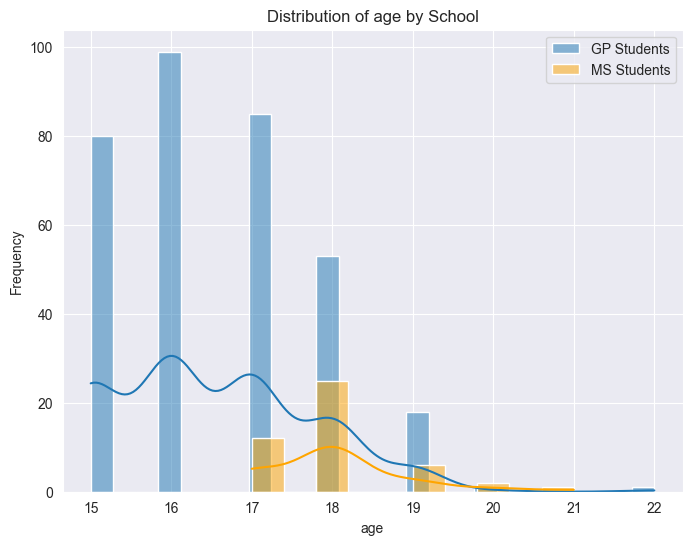

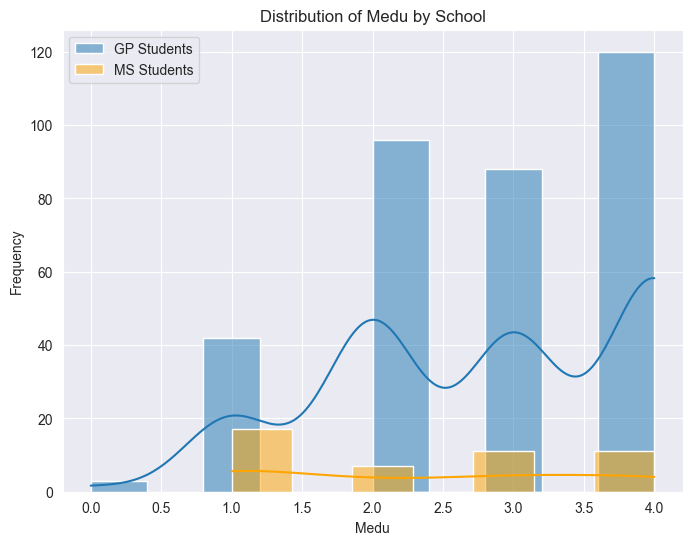

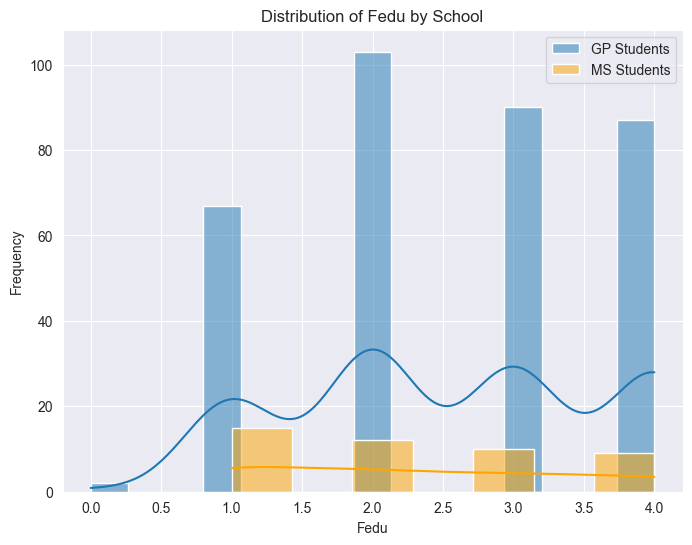

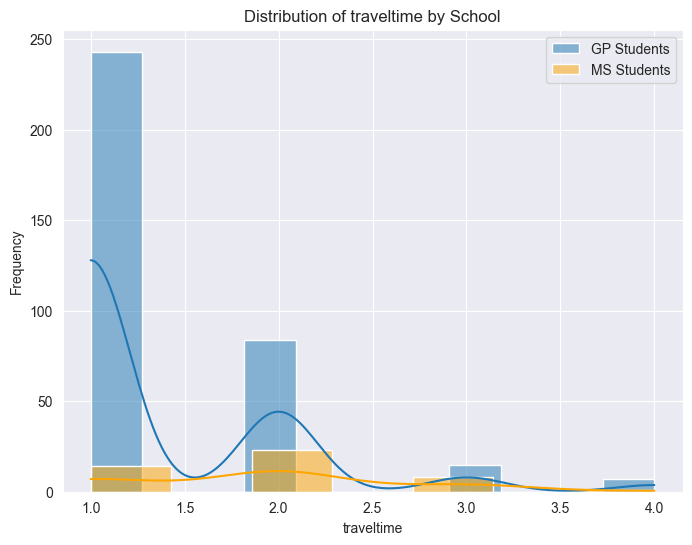

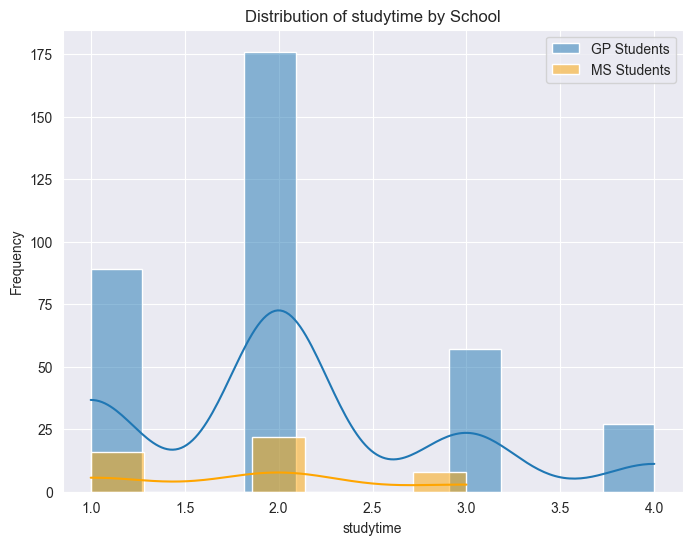

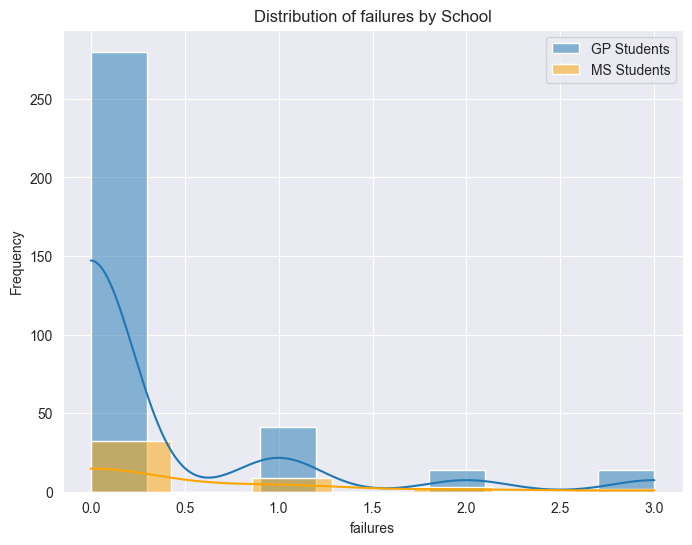

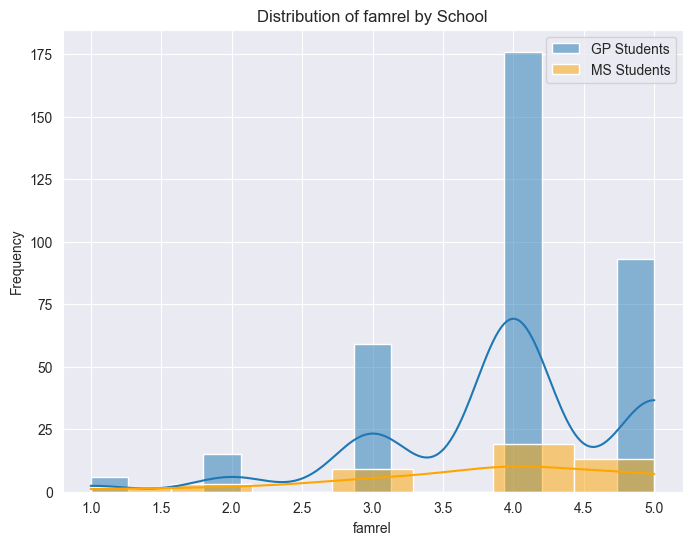

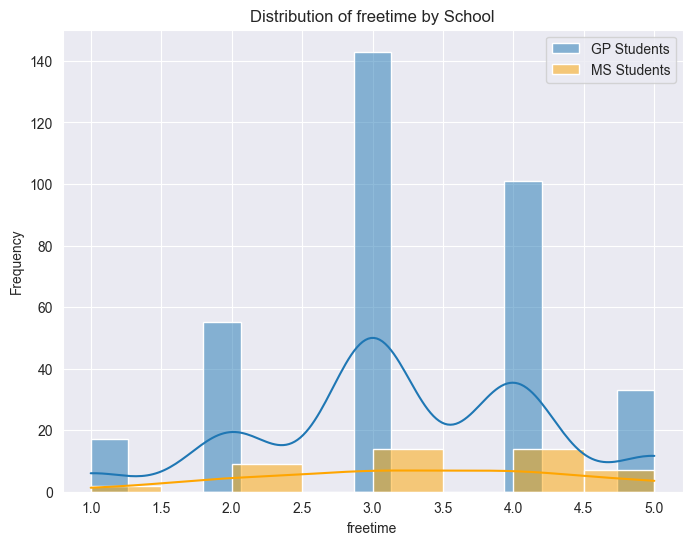

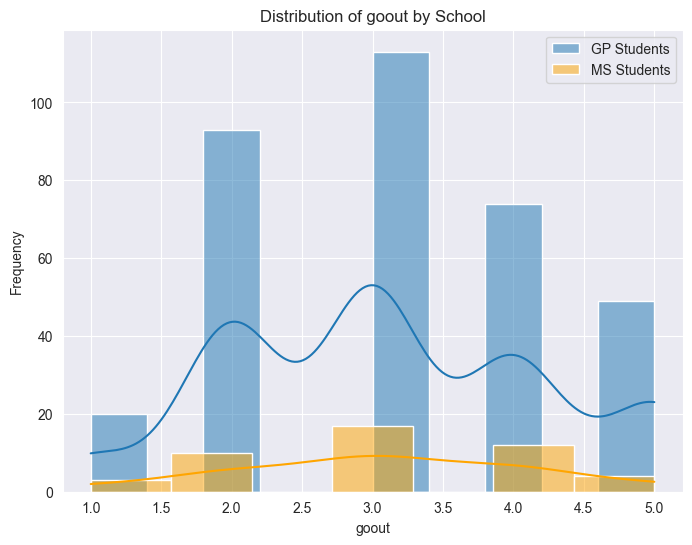

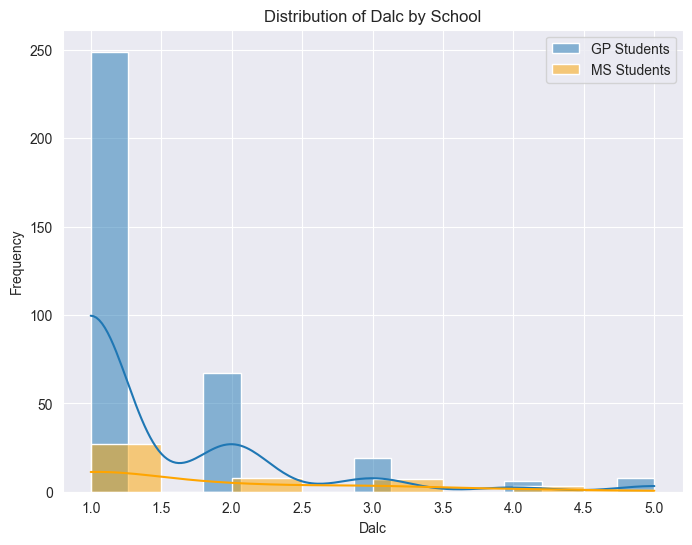

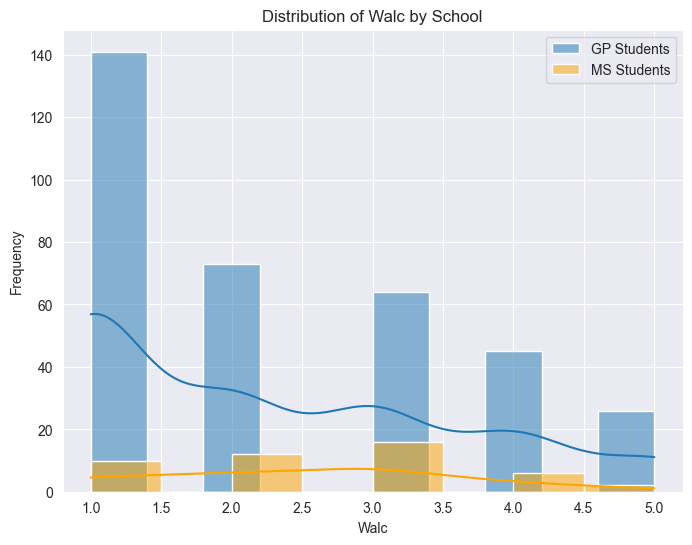

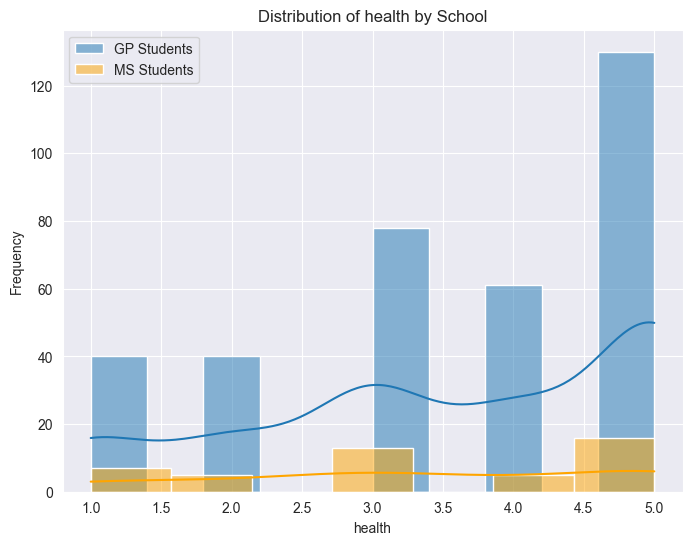

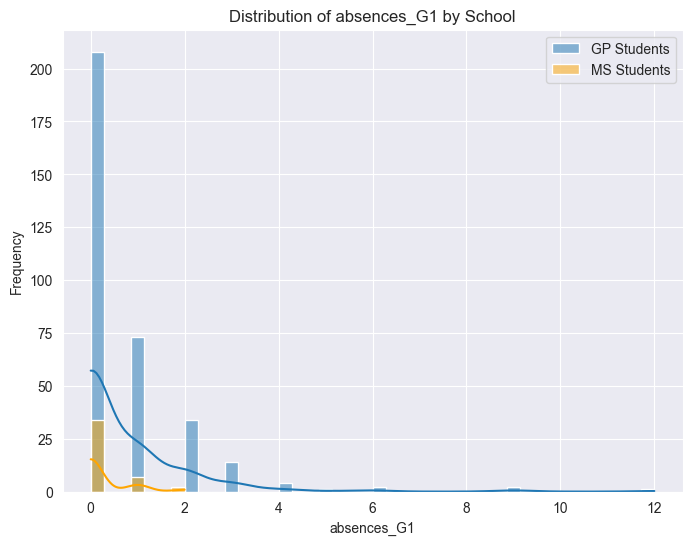

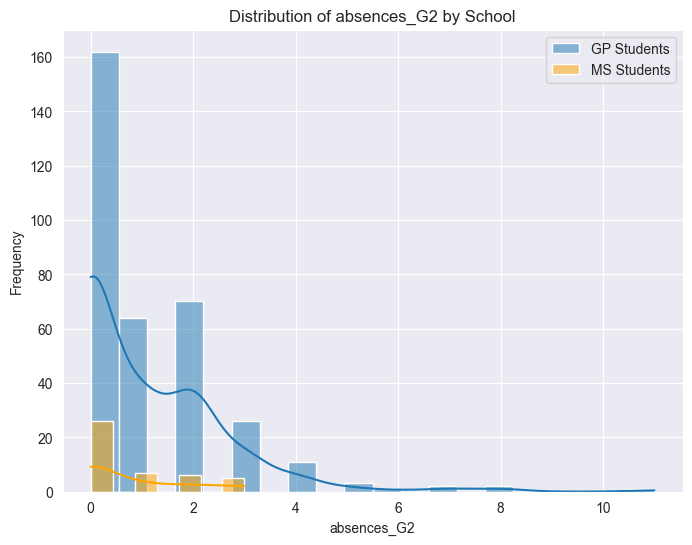

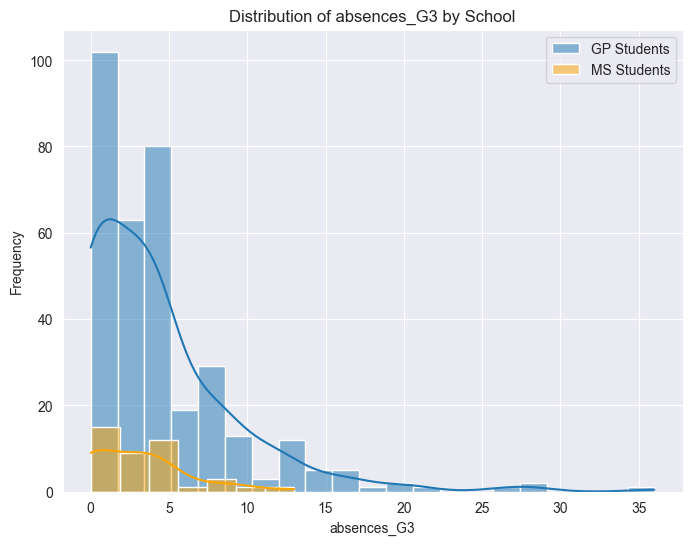

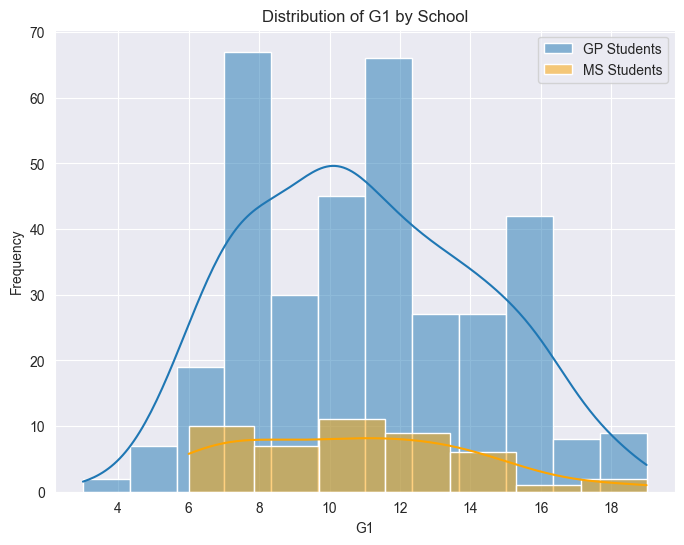

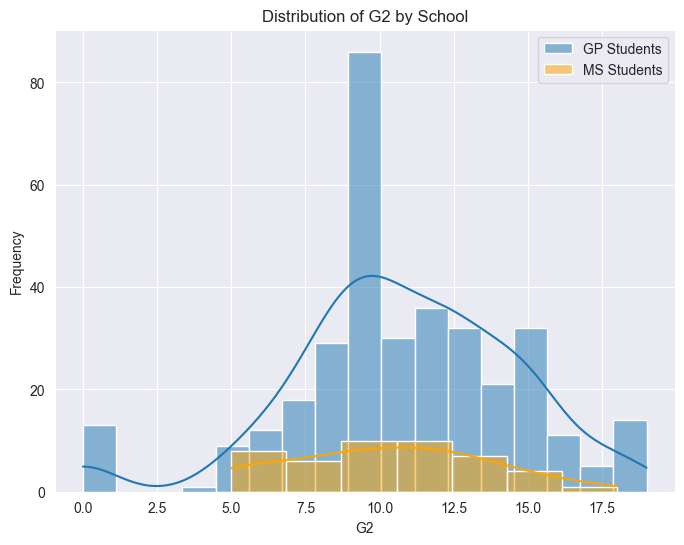

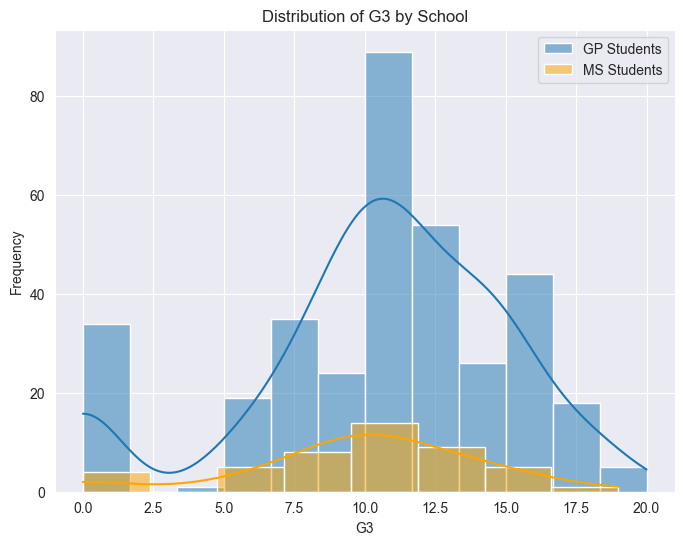


Contingency Table for School vs school:
school   GP  MS
school         
GP      349   0
MS        0  46
Chi-squared test for School vs school: chi2-statistic = 385.34, p-value = 0.000
  Significant association between school and school.

Contingency Table for School vs sex:
sex       F    M
school          
GP      183  166
MS       25   21
Chi-squared test for School vs sex: chi2-statistic = 0.01, p-value = 0.931
  No significant association between school and sex at alpha=0.05.

Contingency Table for School vs address:
address   R    U
school          
GP       63  286
MS       25   21
Chi-squared test for School vs address: chi2-statistic = 28.86, p-value = 0.000
  Significant association between school and address.

Contingency Table for School vs famsize:
famsize  GT3  LE3
school           
GP       252   97
MS        29   17
Chi-squared test for School vs famsize: chi2-statistic = 1.25, p-value = 0.264
  No significant association between school and famsize at alpha=0.05.

Conti

In [93]:


print("Descriptive Statistics for GP Students:")
print(gp_students.describe())

print("\nDescriptive Statistics for MS Students:")
print(ms_students.describe())


numerical_cols = gp_students.select_dtypes(include=['number']).columns

print("Mean comparison:")
for col in numerical_cols:
    mean_gp = gp_students[col].mean()
    mean_ms = ms_students[col].mean()
    print(f"Mean {col} (GP): {mean_gp:.2f}, Mean {col} (MS): {mean_ms:.2f}, Difference: {mean_gp - mean_ms:.2f}")

numerical_cols = gp_students.select_dtypes(include=['number']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(gp_students[col], label='GP Students', kde=True)
    sns.histplot(ms_students[col], color='orange', label='MS Students', kde=True)
    plt.title(f'Distribution of {col} by School')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

categorical_cols = gp_students.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    contingency_table = pd.crosstab(student_raws['school'], student_raws[col])
    print(f"\nContingency Table for School vs {col}:")
    print(contingency_table)
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    print(f"Chi-squared test for School vs {col}: chi2-statistic = {chi2:.2f}, p-value = {p_value:.3f}")
    if p_value < 0.05:
        print(f"  Significant association between school and {col}.")
    else:
        print(f"  No significant association between school and {col} at alpha=0.05.")

##Prepare the Data

###Feature Selection

Based on your data exploration, begin considering the features you want to include in your model. Limiting your data can be beneficial because it reduces complexity and can improve model performance by focusing on the most relevant features.

Create lists below for the columns you want to use in your model based on your exploration above. These features will be used in the column transformer. The list names must match exactly.

- **numeric_columns**: This is your continuous numerical data that MUST include `absences_G1`, `absences_G2`, `absences_G3`, `G1`, and `G2` for use in your custom transformer, in addition to any other numerical columns you want to select. Note: The fact that a column is labeled as an integer or float does not necessarily indicate that it contains continuous data.
- **categorical_columns**: Include at least one categorical column.
- **ordinal_columns**: Include at least one ordinal column.

In [94]:
###ENTER CODE HERE ###
#Feature Selection based on data exploration

"""
School featrue is split intot wo, going 

Additonally, modle perofrmance willimprove if we use One Hot Encoding for columns where the values are either Yes/No or Tryue/False. Reduciton fo computational overhead/compelxityt has a direct relationshiup with model performance!!!

Also, initally I combined daily and wekeend alhocol into one feature, but the correlaiton a,mtrix shows  anegative correlation with the two, menaing weekend is less imapctful than weekday
"""

#Numeric columns - Include required columns/relevant numeric features
numeric_columns = ['absences_G1', 'absences_G2', 'absences_G3', 'G1', 'G2', 
                  'age', 'studytime', 'failures', 'famrel', 'freetime', 
                  'goout', 'Dalc', 'Walc', 'health']

#Categorical columns - Include relevant categorical features
categorical_columns = ['sex', 'address', 'famsize', 'Pstatus', 
                      'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
                      'famsup', 'paid', 'activities', 'nursery', 'higher', 
                      'internet', 'romantic']

#Ordinal? Slim pickings....
ordinal_columns = ['Medu', 'Fedu', 'traveltime']



###Custom Transformer
We want to create a new column that sums the three absences columns together as a new feature. Additionally, we want to  conditionally keep or drop the grades for the first and second terms based on the parameters passed.

G3 is the final year grade and is highly correlated with G2 and G1, which are grades from the first two terms. Predicting G3 without using G2 and G1 is more challenging but also more valuable since you could make predictions earlier in the year. Therefore, later we will create separate models (one that includes the G1 and G2 columns and one that excludes them) to test this.

####Instructions for Submission

Create a custom transformer that:

- Inherits from BaseEstimator and TransformerMixin.
- Implements the fit and transform methods.
- Accepts a DataFrame as input. This differs from the California Housing Prices example, which used arrays. We will pass a DataFrame into the custom transformer to allow for easier testing with CodeGrade.
- In the transform method:
    - Create a new column called `absences_sum` that sums the `absences_G1`, `absences_G2`, and `absences_G3` columns, adds the new `absences_sum` column to the end of the DataFrame, then drops the original three absence columns.
    - Drop the `G1` and `G2` columns if the parameter `drop_grades` is `True`. It will keep the columns if `drop_grades` is `False`.
- Name the custom transformer class `FinalProjectTransformer`.

In [95]:
###ENTER CODE HERE ###
from sklearn.base import BaseEstimator, TransformerMixin
#this transofmrer aggregates absenses to reduce computational cost of computing and evaluating all absenses 
#in additon, i wanted to use this to agrgegate feautres, so it also combines parent education, alcohol consumption, and educational support,r egardless opf dropepe columns
#Is it a co,putational disadtanvaghe to ahve these features remain as independent features to be combatted against each other, instead of combined and aggregated as a joint force feature against other standlone/joitn force features
class FinalProjectTransformer(BaseEstimator, TransformerMixin):

    
    def __init__(self, drop_grades=False):
       
        self.drop_grades = drop_grades #if true, drop the grades
    
    def fit(self, X, y=None):
       
        #I still never really comphrhended why a this fit() function is computationally nessecary when making a custom transformer class
    
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        
         #if drop_grades is True, obliterate G1/G2
        if self.drop_grades:
            print("dropping G1 and G2")
            X_transformed = X_transformed.drop(columns=['G1', 'G2'])
        
        X_transformed['absences_sum'] = ( #Create a new column called `absences_sum` that sums the `absences_G1`, `absences_G2`, and `absences_G3` columns, adds the new `absences_sum` column to the end of the DataFrame, 
            X_transformed['absences_G2'] + 
            X_transformed['absences_G3']
        )
        #then drop the absensec
        X_transformed = X_transformed.drop(columns=['absences_G1', 'absences_G2', 'absences_G3']) 


        #Combine/aggregate complimentary features that work better as an extracted/combiend efature rather than adversarial features. For exmaple, while school supprot wihtout family supprot could have an impact, it also is more susepctible to outliers
        if 'Dalc' in X_transformed.columns and 'Walc' in X_transformed.columns: #Alchohol
            X_transformed['alcohol_consumption'] = (2/7) * X_transformed['Dalc'] + (5/7) * X_transformed['Walc']
            X_transformed = X_transformed.drop(columns=['Dalc', 'Walc'])
        
        
        if 'Medu' in X_transformed.columns and 'Fedu' in X_transformed.columns: #education
            X_transformed['parent_education'] = (X_transformed['Medu'] + X_transformed['Fedu']) / 2
            X_transformed = X_transformed.drop(columns=['Medu', 'Fedu'])
        
   
        if 'schoolsup' in X_transformed.columns and 'famsup' in X_transformed.columns: #exisitng supprot form school and family
            X_transformed['educational_support'] = (
                (X_transformed['schoolsup'] == 'yes').astype(int) + 
                (X_transformed['famsup'] == 'yes').astype(int)
            )
            X_transformed = X_transformed.drop(columns=['schoolsup', 'famsup'])

        return X_transformed

###Data Pipelines Instructions
Creating data pipelines allows you to automate your data cleaning process, making it easy to apply the same transformations to new data. Follow the outline below to transform your dataset into two sets of transformed data: one with the G1/G2 columns and one without them.

####Instructions for Submission
- Numeric Pipeline (you'll need to create two to handle the G1/G2 requirement)
  - Impute missing values using SimpleImputer() (use [.set_output(transform="pandas")](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_set_output.html) to output a DataFrame from your SimpleImputer into your custom transformer) 
  - Transform data using the custom transformer FinalProjectTransformer as appropriate for the task
  - Standardize the data using StandardScalar()
  - Use the following variable names:
    - `numeric_pipeline_with_grades`
    - `numeric_pipeline_without_grades`

- Categorical Pipeline
  - Impute missing values 
  - One-Hot Encode (OHE) categorical data 
  - Use the following variable name:
    - `categorical_pipeline`

- Ordinal Pipeline
  - Impute missing values 
  - Ordinal encode the data
  - Use the following variable name:
    - `ordinal_pipeline`

- Column Transformer (you'll need to create two to handle the two different numeric pipelines)
  - pass in your previously created feature selection lists
  - Combine the numeric, categorical, and ordinal pipelines
  - Use the following variable names:
    - `column_transformer_with_grades`
    - `column_transformer_without_grades`
    
Once the full pipeline is set up, fit and transform `X_train`, saving the results as `X_train_transformed_with_grades` and `X_train_transformed_without_grades`. Confirm that the transformed data without grades has two fewer columns.

In [ ]:
###ENTER CODE HERE ###

#Create the numeric pipeline with grades
numeric_pipeline_with_grades = Pipeline([
    ('imputer', SimpleImputer(strategy='median').set_output(transform="pandas")),
    ('transformer', FinalProjectTransformer(drop_grades=False)),
    ('scaler', StandardScaler())
])

#Create the numeric pipeline without grades
numeric_pipeline_without_grades = Pipeline([
    ('imputer', SimpleImputer(strategy='median').set_output(transform="pandas")),
    ('transformer', FinalProjectTransformer(drop_grades=True)),
    ('scaler', StandardScaler())
])

#Create the categorical pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

#Create the ordinal pipeline
#Define the ordinal categories - this assumes the ordering is known
#For example, for education levels: 0 (none) to 4 (higher education)
medu_categories = [[0, 1, 2, 3, 4]]
fedu_categories = [[0, 1, 2, 3, 4]]
traveltime_categories = [[1, 2, 3, 4]]

ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=medu_categories + fedu_categories + traveltime_categories))
])

#Create the full pipeline with grades
column_transformer_with_grades = ColumnTransformer([
    ('numeric', numeric_pipeline_with_grades, numeric_columns),
    ('categorical', categorical_pipeline, categorical_columns),
    ('ordinal', ordinal_pipeline, ordinal_columns)
])

#Create the full pipeline without grades
column_transformer_without_grades = ColumnTransformer([
    ('numeric', numeric_pipeline_without_grades, numeric_columns),
    ('categorical', categorical_pipeline, categorical_columns),
    ('ordinal', ordinal_pipeline, ordinal_columns)
])

#despite how in dpeth these pipelines go, I still want to rmeove the human element inf eature priortization, so we will do one more random forest pipeline
#Complete pipeline with feature engineering and selection
pipeline_with_feature_engineering = Pipeline([
    #Apply the column transformer first
    ('preprocessor', column_transformer_with_grades),
    #Then apply our feature engineering
    ('feature_engineer', FinalProjectTransformer(drop_grades=False)),
    #Optional: Add feature selection
    ('feature_selector', SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))),
    #Final model (define your model)
    ('model', RandomForestRegressor(random_state=42))  #Replace with your actual model
])

#Split into features and target
X = student_raws.drop(columns=['G3'])
y = student_raws['G3']

#Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Fit and transform the training data with grades
X_train_transformed_with_grades = column_transformer_with_grades.fit_transform(X_train)

#Fit and transform the training data without grades
X_train_transformed_without_grades = column_transformer_without_grades.fit_transform(X_train)


#Check the shapes to confirm the difference
print("Shape of transformed data with grades:", X_train_transformed_with_grades.shape)
print("Shape of transformed data without grades:", X_train_transformed_without_grades.shape)
print("Difference in columns:", X_train_transformed_with_grades.shape[1] - X_train_transformed_without_grades.shape[1])


dropping G1 and G2
Shape of transformed data with grades: (316, 39)
Shape of transformed data without grades: (316, 37)
Difference in columns: 2


##Shortlist Promising Models
In this section, you will fit and compare three regression models to your transformed data, both with and without the G1/G2 columns, using cross-validation. Follow the steps below, using the specified variable names.

1) **Initialize Three Regression Models**
- Linear Regression
- Support Vector Machine (SVM) Regression
- Lasso Regression

2) **Compare Models with Cross-Validation**
- Using the above models, perform cross-validation on each model using both sets of transformed data (with and without G1/G2 columns).

###Instructions for Submission
1) **Initialize the Models**: Instantiate a Linear Regression, SVM Regression, and Lasso Regression model.
  - Use the specified variable names for the respective models:
    - `lin_reg`
    - `svm_reg`
    - `lasso_reg`
2) **Cross-Validation**: Using both sets of transformed data (with and without G1/G2 columns), perform 3-fold cross-validation for each model using RMSE as the metric.
  - You will run cross-validation six times (e.g., cross-validation of the linear regression model with the G1/G2 data, cross-validation of the linear regression model without the G1/G2 data, etc.)
  - Use the specified variable names to save each respective array of scores:
    - `cv_scores_lin_reg_with_grades`
    - `cv_scores_lin_reg_without_grades`
    - `cv_scores_svm_with_grades`
    - `cv_scores_svm_without_grades`
    - `cv_scores_lasso_with_grades`
    - `cv_scores_lasso_without_grades`
  - Use the specified variable names to save the mean of each cross-validation array and print it to view your mean scores:
    - `rmse_lin_reg_with_grades`
    - `rmse_lin_reg_without_grades`
    - `rmse_svm_with_grades`
    - `rmse_svm_without_grades`
    - `rmse_lasso_with_grades`
    - `rmse_lasso_without_grades`

*You are welcome to test and fit more regression models as long as the above three are included and named appropriately*

In [97]:

""" 
I gotta thread a veyr fien needle here. Im going to implement whats asked here to a T, usign exactly what the etxbook describes

BUT! it cnat be dneied that we need to run thes emodels on the GS and MD schools indpeendetly, theres too much  of a differenc ebetwene fiaklures, ages, alc consumption (even when agrgegated!!)

So well be runnign this on both MS and GS schoopls then aggregating the results of those models


"""
#calculate RMSE
def rmse_score(model, X, y):

    return np.sqrt(cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=3) * -1)


#sETUP Models
lin_reg = LinearRegression()
svm_reg = SVR()
lasso_reg = Lasso(alpha=0.1)  #Alpha is sued for L1 measure, we will keep it small but not 0, would make it no different from Lin Reg



print("Cross-validation with G1/G2 grades included:")
cv_scores_lin_reg_with_grades = rmse_score(lin_reg, X_train_transformed_with_grades, y_train)
rmse_lin_reg_with_grades = cv_scores_lin_reg_with_grades.mean()
print(f"Linear Regression RMSE: {rmse_lin_reg_with_grades:.4f}")

#SVM with grades
cv_scores_svm_with_grades = rmse_score(svm_reg, X_train_transformed_with_grades, y_train)
rmse_svm_with_grades = cv_scores_svm_with_grades.mean()
print(f"SVM Regression RMSE: {rmse_svm_with_grades:.4f}")

#Lasso with grades
cv_scores_lasso_with_grades = rmse_score(lasso_reg, X_train_transformed_with_grades, y_train)
rmse_lasso_with_grades = cv_scores_lasso_with_grades.mean()
print(f"Lasso Regression RMSE: {rmse_lasso_with_grades:.4f}")




print("\nCross-validation with G1/G2 excluded:")

#Linear Regression without grades
cv_scores_lin_reg_without_grades = rmse_score(lin_reg, X_train_transformed_without_grades, y_train)
rmse_lin_reg_without_grades = cv_scores_lin_reg_without_grades.mean()
print(f"Linear Regression RMSE: {rmse_lin_reg_without_grades:.4f}")

#SVM Regression without grades
cv_scores_svm_without_grades = rmse_score(svm_reg, X_train_transformed_without_grades, y_train)
rmse_svm_without_grades = cv_scores_svm_without_grades.mean()
print(f"SVM Regression RMSE: {rmse_svm_without_grades:.4f}")

#Lasso Regression without grades
cv_scores_lasso_without_grades = rmse_score(lasso_reg, X_train_transformed_without_grades, y_train)
rmse_lasso_without_grades = cv_scores_lasso_without_grades.mean()
print(f"Lasso Regression RMSE: {rmse_lasso_without_grades:.4f}")

#Compare the best models with and without grades
print("\nComparison Summary:")
print("Best model with grades: ", end="")
if rmse_lin_reg_with_grades <= rmse_svm_with_grades and rmse_lin_reg_with_grades <= rmse_lasso_with_grades:
    print(f"Linear Regression (RMSE: {rmse_lin_reg_with_grades:.4f})")
elif rmse_svm_with_grades <= rmse_lin_reg_with_grades and rmse_svm_with_grades <= rmse_lasso_with_grades:
    print(f"SVM Regression (RMSE: {rmse_svm_with_grades:.4f})")
else:
    print(f"Lasso Regression (RMSE: {rmse_lasso_with_grades:.4f})")

print("Best model without grades: ", end="")
if rmse_lin_reg_without_grades <= rmse_svm_without_grades and rmse_lin_reg_without_grades <= rmse_lasso_without_grades:
    print(f"Linear Regression (RMSE: {rmse_lin_reg_without_grades:.4f})")
elif rmse_svm_without_grades <= rmse_lin_reg_without_grades and rmse_svm_without_grades <= rmse_lasso_without_grades:
    print(f"SVM Regression (RMSE: {rmse_svm_without_grades:.4f})")
else:
    print(f"Lasso Regression (RMSE: {rmse_lasso_without_grades:.4f})")

print("\nEffect of removing G1/G2 on model performance (increase in RMSE):")
print(f"Linear Regression: {rmse_lin_reg_without_grades - rmse_lin_reg_with_grades:.4f}")
print(f"SVM Regression: {rmse_svm_without_grades - rmse_svm_with_grades:.4f}")
print(f"Lasso Regression: {rmse_lasso_without_grades - rmse_lasso_with_grades:.4f}")

Cross-validation with G1/G2 grades included:
Linear Regression RMSE: 1.9487
SVM Regression RMSE: 2.5706
Lasso Regression RMSE: 1.8313

Cross-validation with G1/G2 excluded:
Linear Regression RMSE: 4.6566
SVM Regression RMSE: 4.3283
Lasso Regression RMSE: 4.3640

Comparison Summary:
Best model with grades: Lasso Regression (RMSE: 1.8313)
Best model without grades: SVM Regression (RMSE: 4.3283)

Effect of removing G1/G2 on model performance (increase in RMSE):
Linear Regression: 2.7079
SVM Regression: 1.7577
Lasso Regression: 2.5327


##Fine-Tune the System
In this section, you will use the Support Vector Machine (SVM) regression model and perform grid search to fine-tune its hyperparameters. Follow the steps below to set up the grid search, ensuring you use the specified variable names for automatic grading through CodeGrade.

1) Set Up Grid Search for SVM Regression
  - Define a parameter grid to search over. Review Scikit-learn's documentation for the available hyperparameters for this algorithm.
  - Use GridSearchCV to find the best hyperparameters.
  - Fit the grid search to both sets (with and without the G1/G2 columns) of the transformed training data.

###Instructions for Submission

1) **Define Parameter Grid**: Set up a parameter grid for the SVM regression model name `param_grid`.
2) **Initialize Grid Search**: Initialize the `GridSearchCV` and call this `grid_search`.
3) **Fit the Grid Search**: Fit the grid search to both sets (with and without the G1/G2 columns) of the transformed training data.
4) **Save & Print Best Parameters**: Save the best parameters for each respective fit to `best_params_with_grades` and `best_params_without_grades`, and print them.
5) **Print Best Score**: Use the `best_score_` attribute to view the mean cross-validated score for each respective best_estimator
  
<span style="color:red">Codegrade has a runtime limit of 5 minutes. If your code takes longer than 5 minutes to run, the automatic grading will stop and mark the submission as having an error. Limiting the number of hyperparameters checked during your grid search may greatly reduce your code’s running time.</span>

In [98]:
###ENTER CODE HERE ###

#parameter grid for SVM

param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1],
    'epsilon': [0.1, 0.2]
}

svm_reg = SVR()


#Using 3-fold cross-validation and negative mean squared error as scoring metric
grid_search = GridSearchCV(
    svm_reg,
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    verbose=1  #Set to 1 to see progress
)

#Fit the grid search to the data with grades
print("Performing grid search with grades included...")
grid_search.fit(X_train_transformed_with_grades, y_train)

#Save the best parameters
best_params_with_grades = grid_search.best_params_
print("\nBest parameters with grades:")
print(best_params_with_grades)

#Calculate and print the best RMSE score
best_score_with_grades = np.sqrt(-grid_search.best_score_)
print(f"Best RMSE with grades: {best_score_with_grades:.4f}")

#Fit the grid search to the data without grades
print("\nPerforming grid search without grades included...")
grid_search.fit(X_train_transformed_without_grades, y_train)

#Save the best parameters
best_params_without_grades = grid_search.best_params_
print("\nBest parameters without grades:")
print(best_params_without_grades)

#Calculate and print the best RMSE score
best_score_without_grades = np.sqrt(-grid_search.best_score_)
print(f"Best RMSE without grades: {best_score_without_grades:.4f}")

#Compare the improvement over the default SVM model
print("\nImprovement with hyperparameter tuning:")
print(f"With grades: {rmse_svm_with_grades - best_score_with_grades:.4f}")
print(f"Without grades: {rmse_svm_without_grades - best_score_without_grades:.4f}")

#Create optimized SVM models using the best parameters
best_svm_with_grades = SVR(**best_params_with_grades)
best_svm_without_grades = SVR(**best_params_without_grades)

#Train the optimized models
best_svm_with_grades.fit(X_train_transformed_with_grades, y_train)
best_svm_without_grades.fit(X_train_transformed_without_grades, y_train)

Performing grid search with grades included...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best parameters with grades:
{'C': 0.1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'linear'}
Best RMSE with grades: 1.9633

Performing grid search without grades included...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best parameters without grades:
{'C': 10.0, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'rbf'}
Best RMSE without grades: 4.2773

Improvement with hyperparameter tuning:
With grades: 0.6073
Without grades: 0.0510


SVR(C=10.0, epsilon=0.2, gamma='auto')

##Measure Performance on Test Set
In this section, you will transform the test set using your full pipeline and measure the performance of your best model on the test set. Follow the steps below, using the specified variable names for automatic grading through CodeGrade.

1) Based on all previous cross-validation results, pick your best model.
2) Use the previously created column transformers to transform the test set, both with and without the G1/G2 columns.
3) Using your best model, measure its performance on the test set to estimate the generalization error.
  
###Instructions for Submission
1) **Fit Best Model**: If you haven't already, fit your best model to both sets of your transformed training data. 
2) **Transform the Test Set**: Use your column transformers to transform the test set (`X_test`), both with and without the G1/G2 columns. Name these transformed datasets `X_test_transformed_with_grades` and `X_test_transformed_without_grades`.
3) **Evaluate Performance**: Measure the performance of your best-fitted models on the transformed test sets using Root Mean Squared Error (RMSE) and R-squared (R²) metrics. Save these variables as:
  - `rmse_with_grades`
  - `r2_with_grades`
  - `rmse_without_grades`
  - `r2_without_grades`

dropping G1 and G2
Test Set Performance:
Model with grades:
  RMSE: 2.1016
  R²: 0.7846

Model without grades:
  RMSE: 4.0995
  R²: 0.1804

Performance difference (with grades vs. without grades):
  RMSE difference: 1.9979
  R² difference: 0.6042


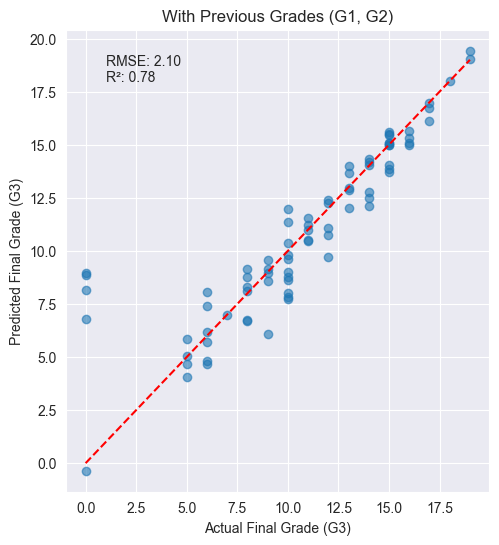

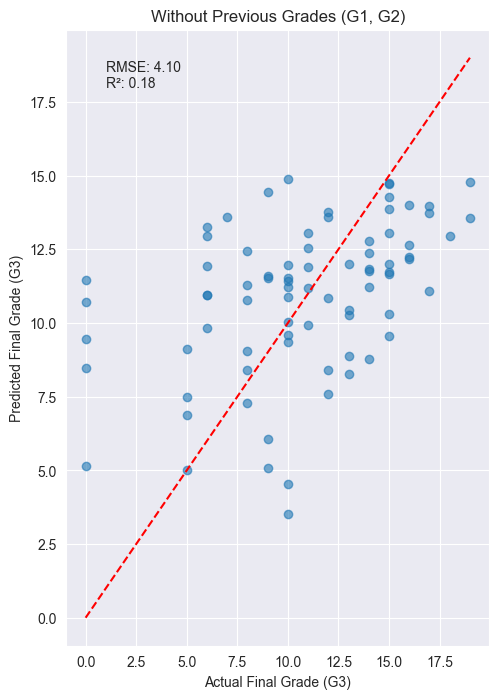

<Figure size 1200x800 with 0 Axes>

In [99]:
###ENTER CODE HERE ###


#1. Transform the test set using both column transformers
X_test_transformed_with_grades = column_transformer_with_grades.transform(X_test)
X_test_transformed_without_grades = column_transformer_without_grades.transform(X_test)

#2. Measure performance of the best model with grades
#Use the best_svm_with_grades model that was fitted in the previous step
y_pred_with_grades = best_svm_with_grades.predict(X_test_transformed_with_grades)
rmse_with_grades = np.sqrt(mean_squared_error(y_test, y_pred_with_grades))
r2_with_grades = r2_score(y_test, y_pred_with_grades)

#3. Measure performance of the best model without grades
#Use the best_svm_without_grades model that was fitted in the previous step
y_pred_without_grades = best_svm_without_grades.predict(X_test_transformed_without_grades)
rmse_without_grades = np.sqrt(mean_squared_error(y_test, y_pred_without_grades))
r2_without_grades = r2_score(y_test, y_pred_without_grades)

#4. Print the results
print("Test Set Performance:")
print(f"Model with grades:")
print(f"  RMSE: {rmse_with_grades:.4f}")
print(f"  R²: {r2_with_grades:.4f}")
print(f"\nModel without grades:")
print(f"  RMSE: {rmse_without_grades:.4f}")
print(f"  R²: {r2_without_grades:.4f}")

#5. Compare the difference in performance
print("\nPerformance difference (with grades vs. without grades):")
print(f"  RMSE difference: {rmse_without_grades - rmse_with_grades:.4f}")
print(f"  R² difference: {r2_with_grades - r2_without_grades:.4f}")





plt.figure(figsize=(12, 6))

#Model with grades
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_with_grades, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Final Grade (G3)')
plt.ylabel('Predicted Final Grade (G3)')
plt.title('With Previous Grades (G1, G2)')
plt.text(min(y_test) + 1, max(y_test) - 1, f'RMSE: {rmse_with_grades:.2f}\nR²: {r2_with_grades:.2f}')
plt.show()

#Model without grades
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_without_grades, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Final Grade (G3)')
plt.ylabel('Predicted Final Grade (G3)')
plt.title('Without Previous Grades (G1, G2)')
plt.text(min(y_test) + 1, max(y_test) - 1, f'RMSE: {rmse_without_grades:.2f}\nR²: {r2_without_grades:.2f}')
plt.show()

plt.tight_layout()
plt.savefig('model_performance_comparison.png')
plt.show()
plt.close()

<span style="color:red">Codegrade has a runtime limit of 5 minutes.  If your code takes longer than 5 minutes to run, the automatic grading will stop and mark the submission as having an error.  Limiting the amount of hyperparameters checked during your grid search may greatly reduce your code’s running time.</span>

##Next Steps
Once you complete all the steps above, you will:

1) Upload your `final_project.ipynb` to the **Final Project Notebook Submission** link in Brightspace to check your work.
2) After passing all unit tests in the automatic grading, finalize your **Executive Summary** document using the student instructions.
3) Submit the **DTSC670_ExecutiveSummary_YourName** document through the **Final Project Executive Summary** submission link.

<span style='color:red'>**BOTH** parts of this project must be completed and submitted to earn a grade.</span>

<span style='color:red'>Submit your Executive Summary only **AFTER** submitting your final autograded notebook to CodeGrade and are satisfied with your score. Your CodeGrade submission score will be used to evaluate your overall project. Note that any CodeGrade submissions made after the Executive Summary has been submitted will not be considered.
</span>